## Objective:

**The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.**


1. **Unnamed: 0:** This seems like an index or identifier for each entry in the dataset.

2. **state_code:** The state code where the startup is located.

3. **latitude, longitude:** Geographical coordinates of the startup.

4. **zip_code:** The postal code of the startup's location.

5. **id:** A unique identifier for each startup.

6. **city:** The city where the startup is based.

7. **Unnamed: 6:** An unspecified column.

8. **name:** The name of the startup.

9. **labels:** A numerical label indicating some characteristic of the startup.

10. **founded_at:** The date when the startup was founded.

11. **closed_at:** The date when the startup was closed, if applicable.

12. **first_funding_at, last_funding_at:** Dates of the first and last funding rounds.

13. **age_first_funding_year:** The time between founding and the first funding round in years.

14. **age_last_funding_year:** The time between founding and the last funding round in years.

15. **age_first_milestone_year, age_last_milestone_year:** Time between founding and the first/last milestone in years.

16. **relationships:** The number of relationships the startup has, possibly with other companies or entities.

17. **funding_rounds:** The total number of funding rounds.

18. **funding_total_usd:** The total amount of funding in USD.

19. **milestones:** The total number of milestones achieved by the startup.

20. **state_code.1:** Another mention of the state code.

21. **is_CA, is_NY, is_MA, is_TX, is_otherstate:** Binary indicators for different states.

22. **category_code:** The category or industry of the startup.

23. **is_software, is_web, is_mobile, is_enterprise, is_advertising, is_gamesvideo, is_ecommerce, is_biotech, is_consulting, is_othercategory:** Binary indicators for different categories.

24. **object_id:** Another identifier, possibly for linking with other datasets.

25. **has_VC, has_angel, has_roundA, has_roundB, has_roundC, has_roundD:** Binary indicators for different types of funding.

26. **avg_participants:** The average number of participants in funding rounds.

27. **is_top500:** Binary indicator for whether the startup is in the top 500.

28. **status:** The target variable indicating whether the startup is 'acquired' or 'closed'.

These are educated guesses based on the variable names and their general context in the startup domain.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('startup data.csv')

In [115]:
df.shape

(923, 49)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [117]:
pd.set_option('display.max_columns',None)

In [118]:
df.head()

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  \
0      San Diego                     NaN        Bandsintown       1   
1      Los Gatos                     NaN          TriCipher       1   
2      San Diego      San Diego CA 92121              Plixi       1   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0   

  founded_at  closed_at first_funding_at last_funding_at  \
0   1/1/2007        NaN         4/1/2009        1/1/2010   
1   1/1/2000        NaN        2/14/2005      12/28/2009   
2  3/18/2009        NaN        3/30/2010       3/30/2010   
3   1/1/2002        NaN        2/17/2005       4/25/2007   
4   8/1/2010  10/1/2012         8/1/2010        4/1/2012   

   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  2.2493                 3.0027                    4.6685   
1                  5.1260                 9.9973                    7.0055   
2                  1.0329                 1.0329                    1.4575   
3                  3.1315                 5.3151                    6.0027   
4                  0.0000                 1.6685                    0.0384   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                   6.7041              3               3             375000   
1                   7.0055              9               4           40100000   
2                   2.2055              5               1            2600000   
3                   6.0027              5               3           40000000   
4                   0.0384              2               2            1300000   

   milestones state_code.1  is_CA  is_NY  is_MA  is_TX  is_otherstate  \
0           3           CA      1      0      0      0              0   
1           1           CA      1      0      0      0              0   
2           2           CA      1      0      0      0              0   
3           1           CA      1      0      0      0              0   
4           1           CA      1      0      0      0              0   

  category_code  is_software  is_web  is_mobile  is_enterprise  \
0         music            0       0          0              0   
1    enterprise            0       0          0              1   
2           web            0       1          0              0   
3      software            1       0          0              0   
4   games_video            0       0          0              0   

   is_advertising  is_gamesvideo  is_ecommerce  is_biotech  is_consulting  \
0               0              0             0           0              0   
1               0              0             0           0              0   
2               0              0             0           0              0   
3               0              0             0           0              0   
4               0              1             0           0              0   

   is_othercategory object_id  has_VC  has_angel  has_roundA  has_roundB  \
0                 1    c:6669       0          1           0           0   
1                 0   c:16283       1          0           0           1   
2                 0   c:65620       0          0           1           0   
3                 0   c:42668       0          0           0           1   
4                 0   c:65806       1          1           0           0   

   has_roundC  has_roundD  avg_participants  is_top500    status  
0           0           0  

In [119]:
df.isnull().sum()[df.isnull().sum() > 0]

Unnamed: 6                  493
closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code.1                  1
dtype: int64

 - Unnamed:6 column should be dropped. (We don't need it for our model, we can drp it later on)
 - Closed_at missing values indicate that they are all acquired, we can replace it with any date suitable for the time being (We don't need it for our model)
 - age_first_milestone_year and age_last_milestone_year missing value is because they 0 milestones. Will replace it with 0.
 - For age milestone we can use either mean or median or 0(depending on the founded year)

In [120]:
df.describe()

Unnamed: 0    latitude   longitude      labels  \
count   923.000000  923.000000  923.000000  923.000000   
mean    572.297941   38.517442 -103.539212    0.646804   
std     333.585431    3.741497   22.394167    0.478222   
min       1.000000   25.752358 -122.756956    0.000000   
25%     283.500000   37.388869 -122.198732    0.000000   
50%     577.000000   37.779281 -118.374037    1.000000   
75%     866.500000   40.730646  -77.214731    1.000000   
max    1153.000000   59.335232   18.057121    1.000000   

       age_first_funding_year  age_last_funding_year  \
count              923.000000             923.000000   
mean                 2.235630               3.931456   
std                  2.510449               2.967910   
min                 -9.046600              -9.046600   
25%                  0.576700               1.669850   
50%                  1.446600               3.528800   
75%                  3.575350               5.560250   
max                 21.895900              21.895900   

       age_first_milestone_year  age_last_milestone_year  relationships  \
count                771.000000               771.000000     923.000000   
mean                   3.055353                 4.754423       7.710726   
std                    2.977057                 3.212107       7.265776   
min                  -14.169900                -7.005500       0.000000   
25%                    1.000000                 2.411000       3.000000   
50%                    2.520500                 4.476700       5.000000   
75%                    4.686300                 6.753400      10.000000   
max                   24.684900                24.684900      63.000000   

       funding_rounds  funding_total_usd  milestones       is_CA       is_NY  \
count      923.000000       9.230000e+02  923.000000  923.000000  923.000000   
mean         2.310943       2.541975e+07    1.841820    0.527627    0.114843   
std          1.390922       1.896344e+08    1.322632    0.499507    0.319005   
min          1.000000       1.100000e+04    0.000000    0.000000    0.000000   
25%          1.000000       2.725000e+06    1.000000    0.000000    0.000000   
50%          2.000000       1.000000e+07    2.000000    1.000000    0.000000   
75%          3.000000       2.472500e+07    3.000000    1.000000    0.000000   
max         10.000000       5.700000e+09    8.000000    1.000000    1.000000   

            is_MA       is_TX  is_otherstate  is_software      is_web  \
count  923.000000  923.000000     923.000000   923.000000  923.000000   
mean     0.089924    0.045504       0.221018     0.165764    0.156013   
std      0.286228    0.208519       0.415158     0.372070    0.363064   
min      0.000000    0.000000       0.000000     0.000000    0.000000   
25%      0.000000    0.000000       0.000000     0.000000    0.000000   
50%      0.000000    0.000000       0.000000     0.000000    0.000000   
75%      0.000000    0.000000       0.000000     0.000000    0.000000   
max      1.000000    1.000000       1.000000     1.000000    1.000000   

       is_mobile  is_enterprise  is_advertising  is_gamesvideo  is_ecommerce  \
count  923.00000     923.000000      923.000000     923.000000    923.000000   
mean     0.08559       0.079090        0.067172       0.056338      0.027086   
std      0.27991       0.270025        0.250456       0.230698      0.162421   
min      0.00000       0.000000        0.000000       0.000000      0.000000   
25%      0.00000       0.000000        0.000000       0.000000      0.000000   
50%      0.00000       0.000000        0.000000       0.000000      0.000000   
75%      0.00000       0.000000        0.000000       0.000000      0.000000   
max      1.00000       1.000000        1.000000       1.000000      1.000000   

       is_biotech  is_consulting  is_othercategory      has_VC   has_angel  \
count  923.000000     923.000000        923.000000  923.000000  923.000000   
mean     0.036836       0.003250          0.3228

Handling missing values:

In [121]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(value="0")
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(value="0")

In [122]:
df.isnull().sum()[df.isnull().sum() > 0]

Unnamed: 6      493
closed_at       588
state_code.1      1
dtype: int64

### Visualizations

<Axes: xlabel='status', ylabel='count'>

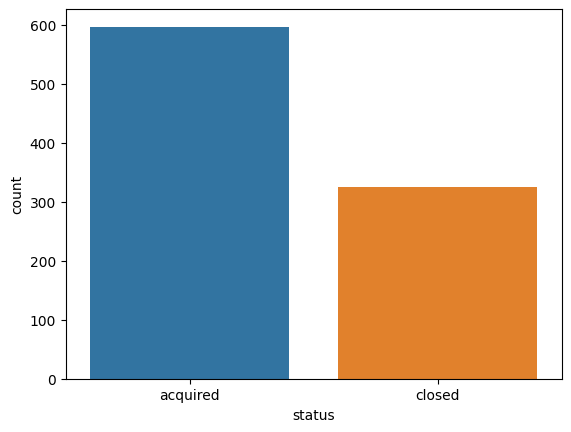

In [123]:
sns.countplot(x = 'status', data = df)

In [124]:
df.corr()

<ipython-input-124-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Unnamed: 0  latitude  longitude    labels  \
Unnamed: 0                1.000000  0.054726   0.023292 -0.068721   
latitude                  0.054726  1.000000   0.368475  0.046560   
longitude                 0.023292  0.368475   1.000000 -0.036092   
labels                   -0.068721  0.046560  -0.036092  1.000000   
age_first_funding_year   -0.004507 -0.046868  -0.014158 -0.075637   
age_last_funding_year    -0.116533 -0.041692  -0.000148  0.073731   
relationships            -0.079950 -0.039198  -0.073197  0.360434   
funding_rounds           -0.118456 -0.000659   0.022447  0.206049   
funding_total_usd        -0.064169 -0.072941   0.017970  0.040176   
milestones               -0.000338  0.017708  -0.016420  0.328260   
is_CA                    -0.042446 -0.417471  -0.780122  0.077217   
is_NY                     0.033485  0.205747   0.449871  0.059996   
is_MA                     0.043021  0.318015   0.441031  0.081735   
is_TX                    -0.021463 -0.423888   0.066199 -0.045309   
is_otherstate             0.002249  0.338590   0.257801 -0.169067   
is_software               0.001367 -0.001656   0.024857  0.012429   
is_web                    0.007076 -0.009799  -0.022024 -0.000873   
is_mobile                -0.028279  0.035917   0.013527  0.007312   
is_enterprise             0.042640 -0.002291  -0.003244  0.073772   
is_advertising           -0.075131  0.054575   0.039998  0.044355   
is_gamesvideo             0.065020 -0.033160  -0.025569 -0.025893   
is_ecommerce             -0.026132  0.041628   0.043092 -0.072193   
is_biotech                0.004224  0.012956   0.028075  0.000104   
is_consulting            -0.040929 -0.033905   0.021244  0.002373   
is_othercategory          0.006243 -0.039656  -0.046560 -0.042408   
has_VC                   -0.040057  0.031045   0.024852 -0.056515   
has_angel                 0.134044  0.028891   0.102001 -0.072840   
has_roundA               -0.076568 -0.033072  -0.066288  0.184307   
has_roundB               -0.135289 -0.011801  -0.067017  0.208257   
has_roundC               -0.090922 -0.057762  -0.042309  0.165902   
has_roundD               -0.081123 -0.018825  -0.042854  0.139940   
avg_participants          0.026713 -0.018176  -0.045191  0.185992   
is_top500                 0.026019  0.032675  -0.091913  0.310652   

                        age_first_funding_year  age_last_funding_year  \
Unnamed: 0                           -0.004507              -0.116533   
latitude                             -0.046868              -0.041692   
longitude                            -0.014158              -0.000148   
labels                               -0.075637               0.073731   
age_first_funding_year                1.000000               0.762382   
age_last_funding_year                 0.762382               1.000000   
relationships                        -0.187817               0.073080   
funding_rounds                       -0.155478               0.385999   
funding_total_usd                     0.046350               0.116371   
milestones                           -0.295894              -0.122905   
is_CA                                -0.010800               0.006190   
is_NY                                -0.128102              -0.143312   
is_MA                                 0.020279               0.096325   
is_TX                                 0.032838               0.014965   
is_otherstate                         0.081031               0.029313   
is_software                           0.116797               0.116670   
is_web                               -0.166601              -0.216886   
is_mobile                            -0.054658               0.010886   
is_enterprise                        -0.047326               0.006887   
is_advertising                       -0.071336              -0.056837   
is_gamesvideo                        -0.063787              -0.078674   
is_ecommerce                         -0.071580              -0.108662  

In [125]:
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

In [126]:
df.corr()

<ipython-input-126-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Unnamed: 0  latitude  longitude    labels  \
Unnamed: 0                  1.000000  0.054726   0.023292 -0.068721   
latitude                    0.054726  1.000000   0.368475  0.046560   
longitude                   0.023292  0.368475   1.000000 -0.036092   
labels                     -0.068721  0.046560  -0.036092  1.000000   
age_first_funding_year     -0.004507 -0.046868  -0.014158 -0.075637   
age_last_funding_year      -0.116533 -0.041692  -0.000148  0.073731   
age_first_milestone_year   -0.130166 -0.041030  -0.054850  0.250163   
age_last_milestone_year    -0.123438 -0.017674  -0.083744  0.358600   
relationships              -0.079950 -0.039198  -0.073197  0.360434   
funding_rounds             -0.118456 -0.000659   0.022447  0.206049   
funding_total_usd          -0.064169 -0.072941   0.017970  0.040176   
milestones                 -0.000338  0.017708  -0.016420  0.328260   
is_CA                      -0.042446 -0.417471  -0.780122  0.077217   
is_NY                       0.033485  0.205747   0.449871  0.059996   
is_MA                       0.043021  0.318015   0.441031  0.081735   
is_TX                      -0.021463 -0.423888   0.066199 -0.045309   
is_otherstate               0.002249  0.338590   0.257801 -0.169067   
is_software                 0.001367 -0.001656   0.024857  0.012429   
is_web                      0.007076 -0.009799  -0.022024 -0.000873   
is_mobile                  -0.028279  0.035917   0.013527  0.007312   
is_enterprise               0.042640 -0.002291  -0.003244  0.073772   
is_advertising             -0.075131  0.054575   0.039998  0.044355   
is_gamesvideo               0.065020 -0.033160  -0.025569 -0.025893   
is_ecommerce               -0.026132  0.041628   0.043092 -0.072193   
is_biotech                  0.004224  0.012956   0.028075  0.000104   
is_consulting              -0.040929 -0.033905   0.021244  0.002373   
is_othercategory            0.006243 -0.039656  -0.046560 -0.042408   
has_VC                     -0.040057  0.031045   0.024852 -0.056515   
has_angel                   0.134044  0.028891   0.102001 -0.072840   
has_roundA                 -0.076568 -0.033072  -0.066288  0.184307   
has_roundB                 -0.135289 -0.011801  -0.067017  0.208257   
has_roundC                 -0.090922 -0.057762  -0.042309  0.165902   
has_roundD                 -0.081123 -0.018825  -0.042854  0.139940   
avg_participants            0.026713 -0.018176  -0.045191  0.185992   
is_top500                   0.026019  0.032675  -0.091913  0.310652   

                          age_first_funding_year  age_last_funding_year  \
Unnamed: 0                             -0.004507              -0.116533   
latitude                               -0.046868              -0.041692   
longitude                              -0.014158              -0.000148   
labels                                 -0.075637               0.073731   
age_first_funding_year                  1.000000               0.762382   
age_last_funding_year                   0.762382               1.000000   
age_first_milestone_year                0.382395               0.529763   
age_last_milestone_year                 0.236958               0.436369   
relationships                          -0.187817               0.073080   
funding_rounds                         -0.155478               0.385999   
funding_total_usd                       0.046350               0.116371   
milestones                             -0.295894              -0.122905   
is_CA                                  -0.010800               0.006190   
is_NY                                  -0.128102              -0.143312   
is_MA                                   0.020279               0.096325   
is_TX                                   0.032838               0.014965   
is_otherstate                           0.081031               0.029313   
is_software                             0.116797               0.116670   
is_web                                 -0.16

<ipython-input-127-b14ab079f079>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), cmap='YlGnBu',annot=True)


(35.5, -0.5)

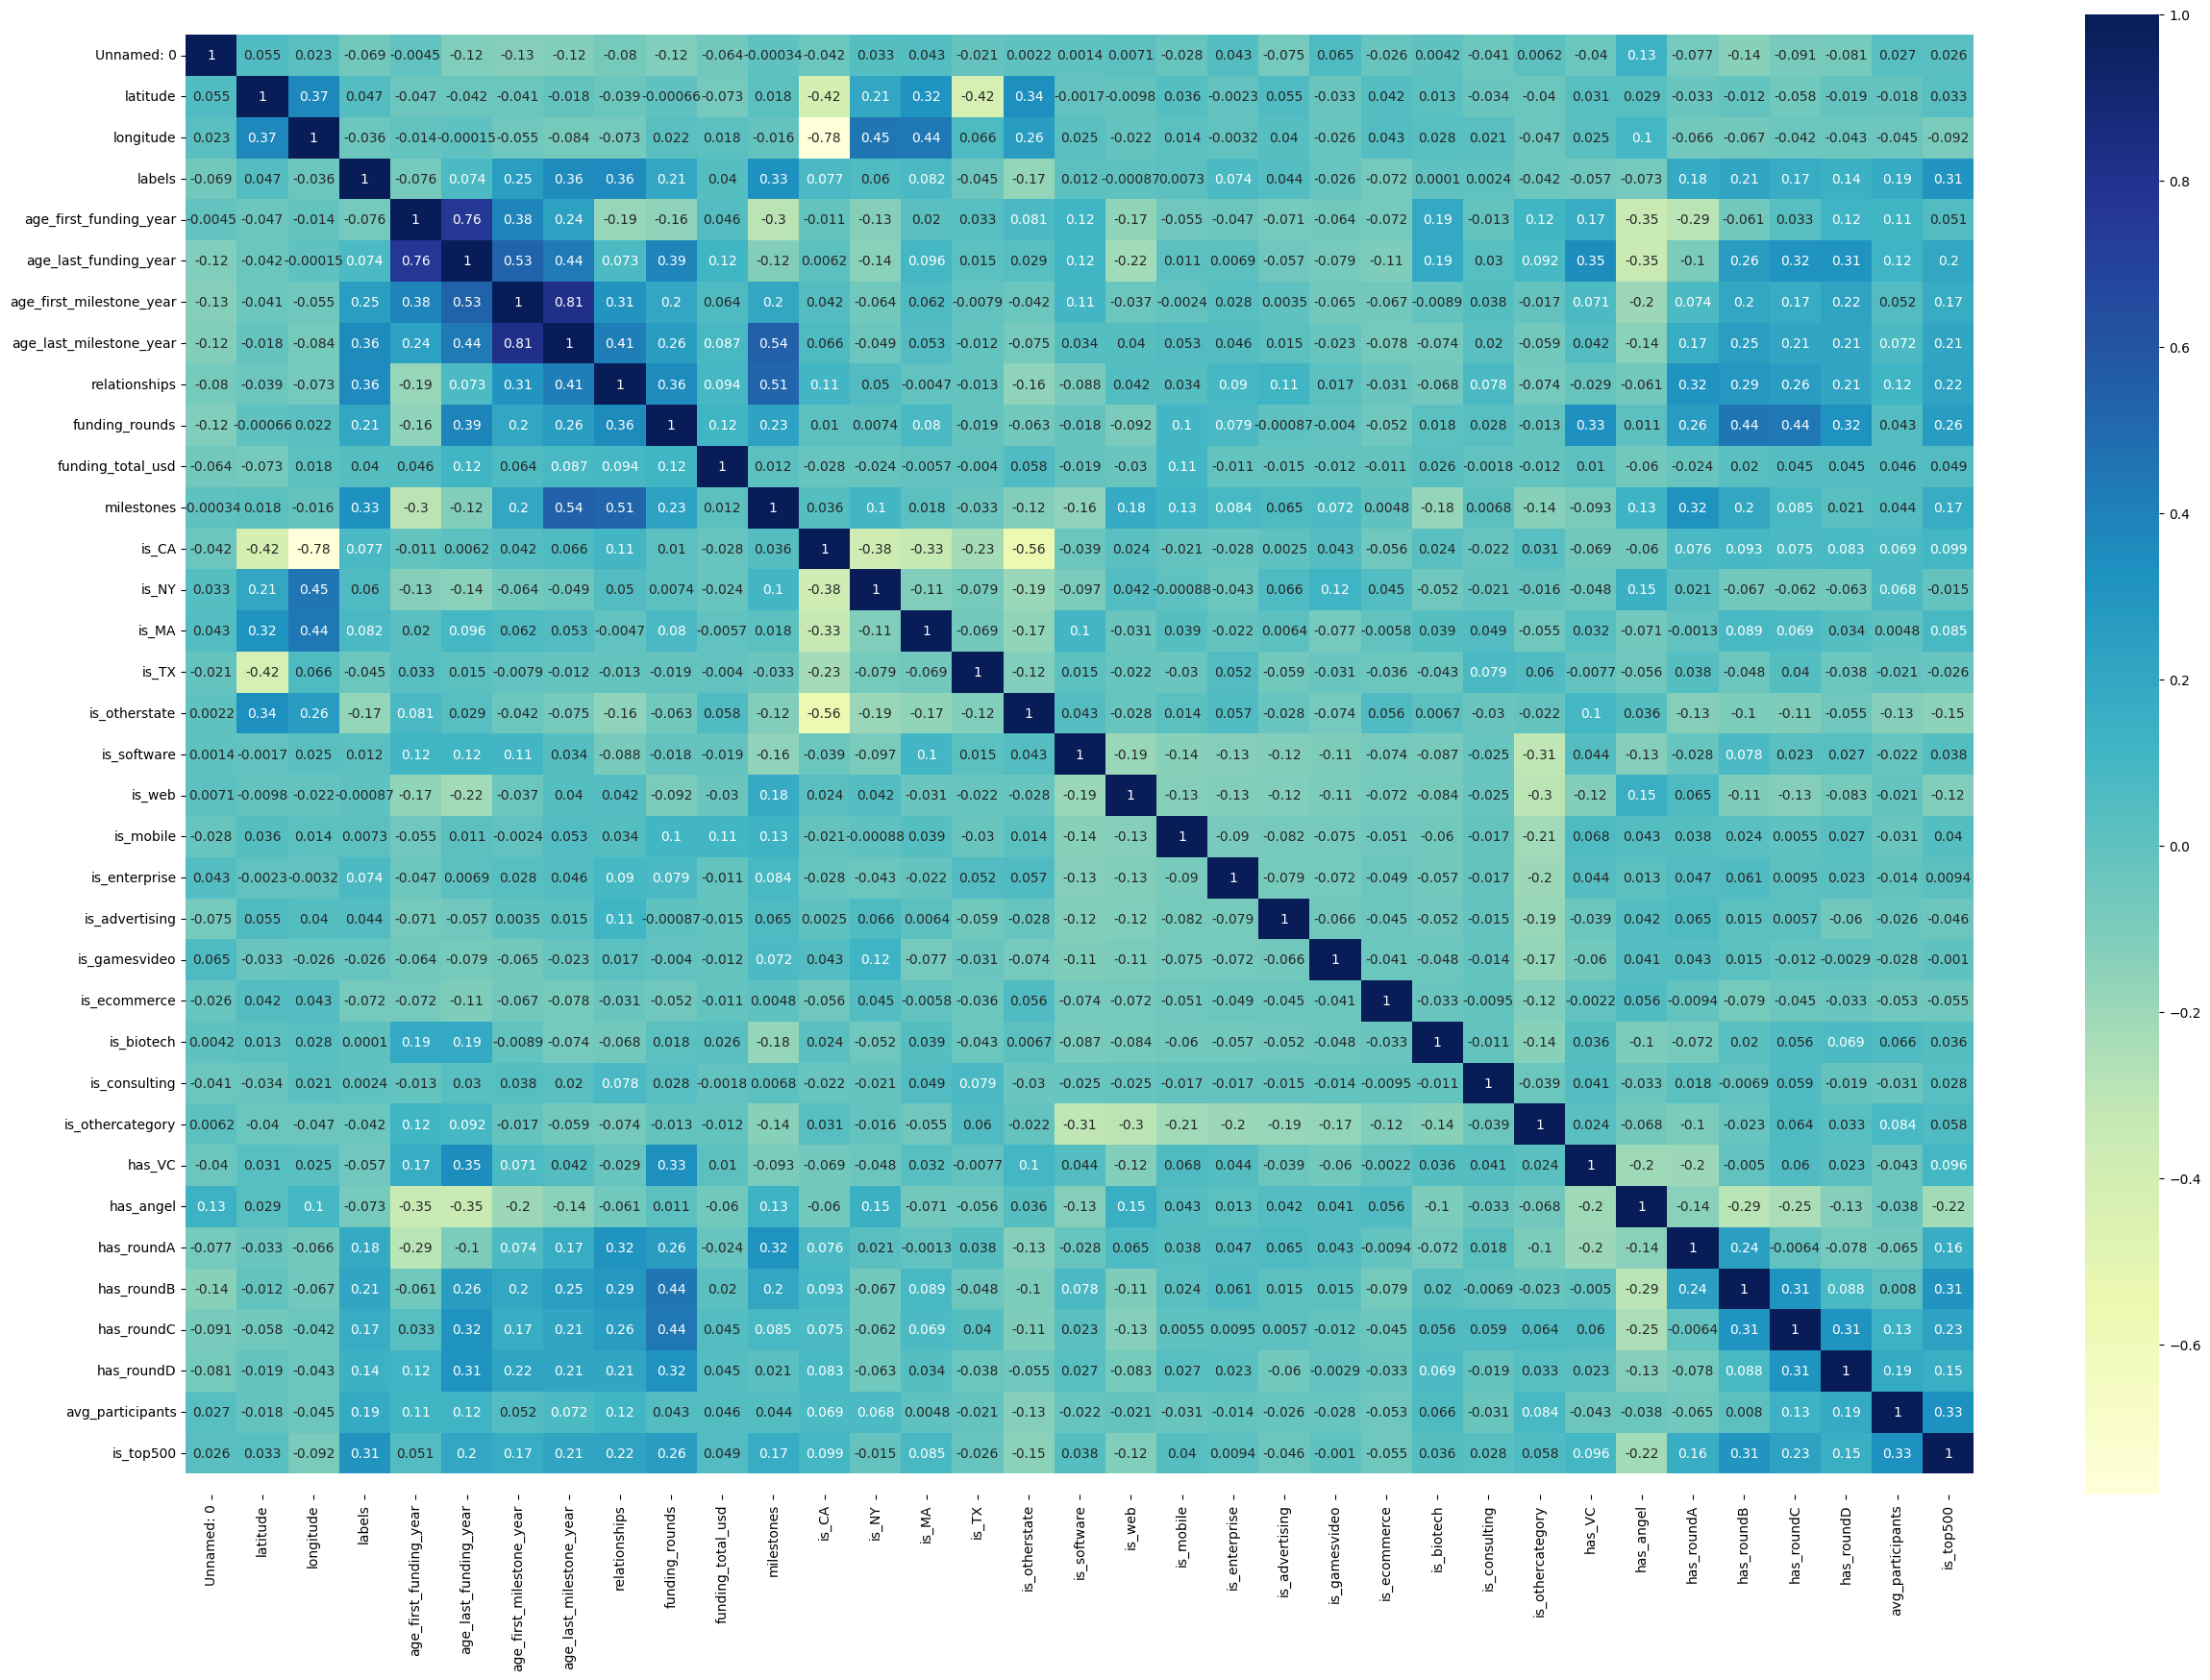

In [127]:
plt.figure(figsize=(30,20))

ax = sns.heatmap(df.corr(), cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

<ipython-input-128-065bcc1908af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


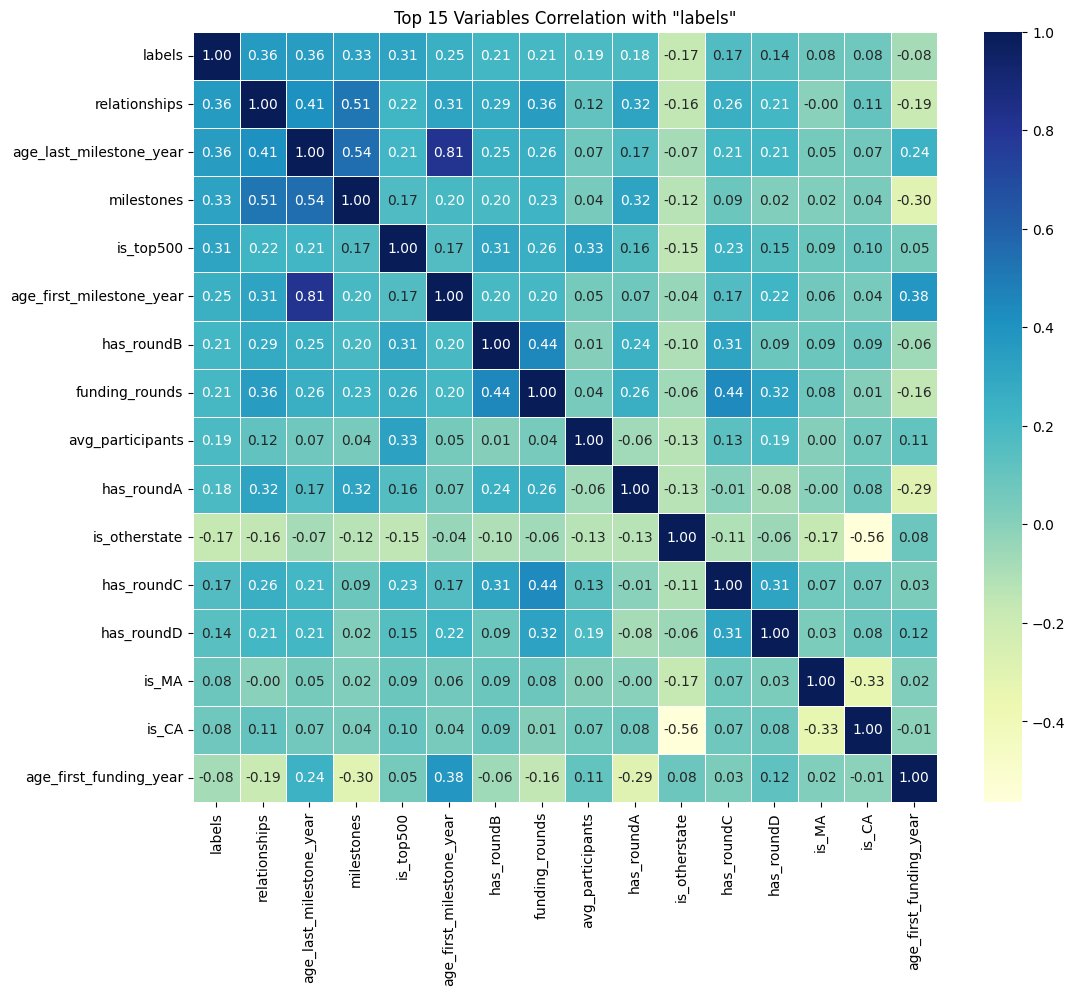

In [128]:
correlation_matrix = df.corr()
top_correlations = correlation_matrix['labels'].abs().sort_values(ascending=False).head(16)

top_corr_matrix = correlation_matrix.loc[top_correlations.index, top_correlations.index]
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Top 15 Variables Correlation with "labels"')
plt.show()


[Text(0.5, 4.444444444444445, 'age_first_milestone_year'),
 Text(4.444444444444445, 0.5, 'age_last_milestone_year')]

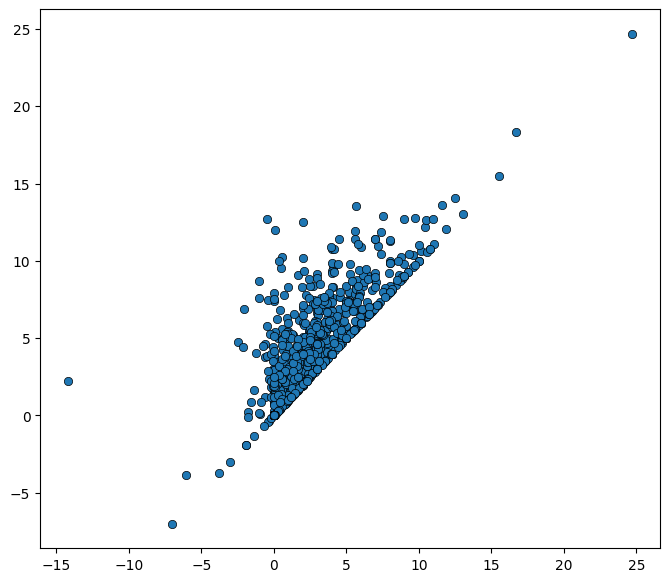

In [129]:
plt.figure(figsize=(8,7))
plt.scatter(x=df['age_first_milestone_year'], y=df['age_last_milestone_year'], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="age_first_milestone_year", ylabel="age_last_milestone_year")

<Axes: xlabel='status', ylabel='count'>

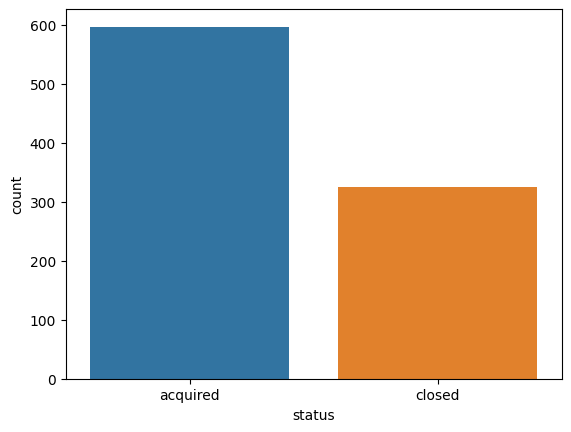

In [130]:
sns.countplot(x = 'status', data = df)

<Axes: xlabel='labels', ylabel='count'>

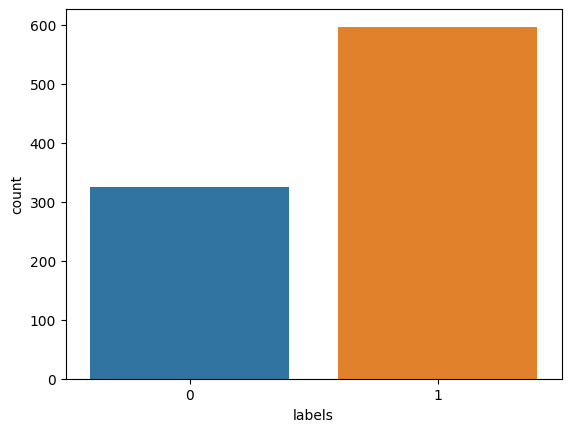

In [131]:
sns.countplot(x = 'labels', data = df)

In [132]:
df['multiple_rounds'] = df[['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']].sum(axis=1)
df['funding_status'] = 'No Funding'

df.loc[df['multiple_rounds'] > 1, 'funding_status'] = 'Multiple Rounds'
df.loc[df['multiple_rounds'] == 1, 'funding_status'] = 'Single Round'

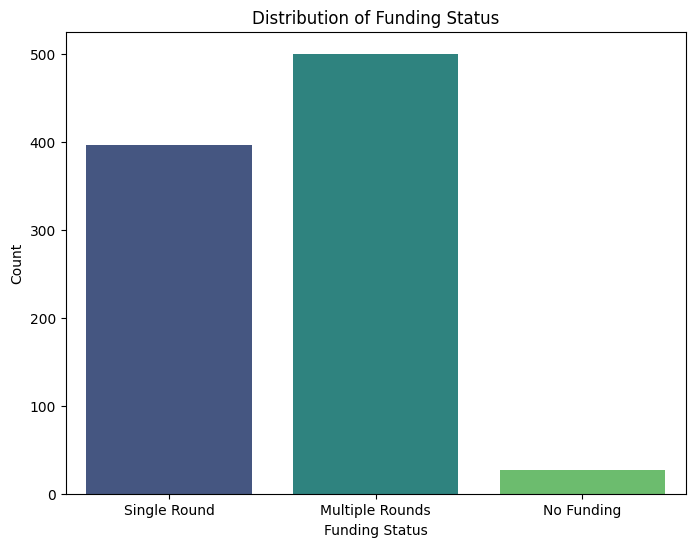

In [133]:
plt.figure(figsize=(8, 6))
sns.countplot(x='funding_status', data=df, palette='viridis')
plt.title('Distribution of Funding Status')
plt.xlabel('Funding Status')
plt.ylabel('Count')
plt.show()

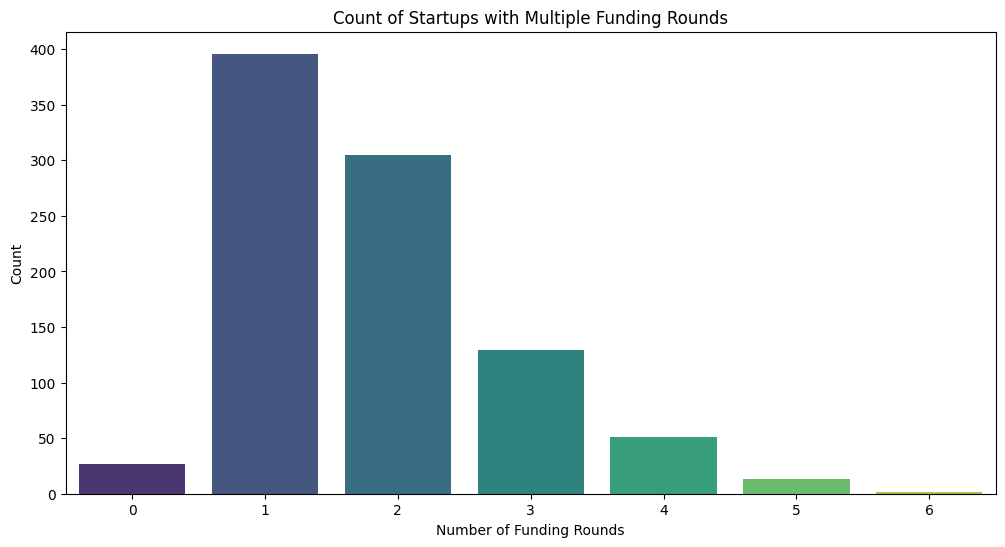

In [134]:
plt.figure(figsize=(12, 6))
sns.countplot(x='multiple_rounds', data=df, palette='viridis')
plt.title('Count of Startups with Multiple Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Count')
plt.show()

In [135]:
category_counts = df['category_code'].value_counts()

df['category_grouped'] = df['category_code'].apply(lambda x: x if category_counts[x] >= 15 else 'other')

In [136]:
df['category_grouped'].value_counts()

software            153
web                 144
other               119
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
network_hosting      34
biotech              34
hardware             27
public_relations     25
ecommerce            25
cleantech            23
security             19
analytics            19
Name: category_grouped, dtype: int64

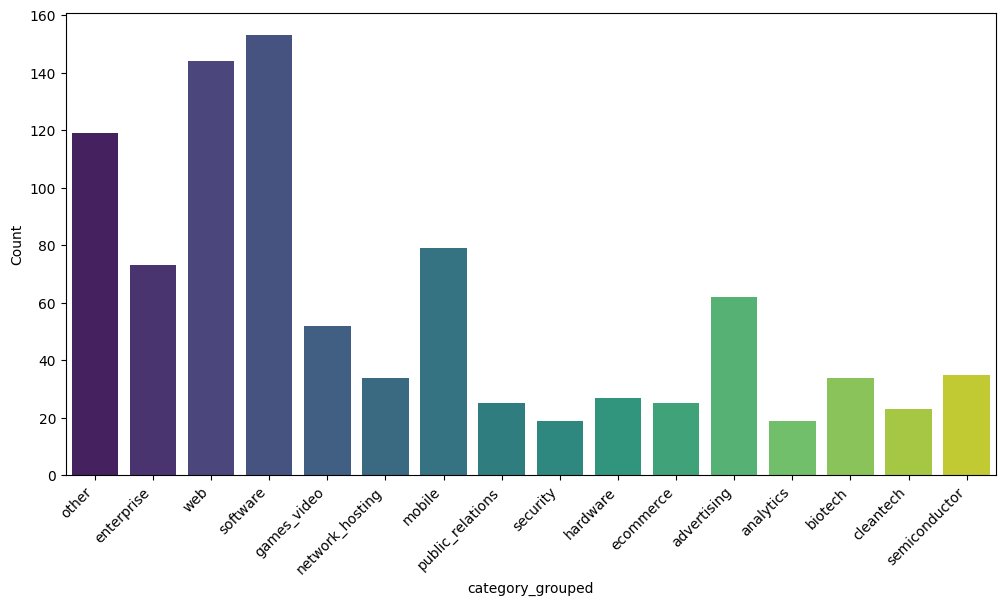

In [137]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category_grouped', data=df, palette='viridis')
#plt.title('Count of Startups with Multiple Funding Rounds')
#plt.xlabel('Number of Funding Rounds')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()

In [138]:
df['State'] = 'other'
df.loc[(df['state_code'] == 'CA'), 'State'] = 'CA'
df.loc[(df['state_code'] == 'NY'), 'State'] = 'NY'
df.loc[(df['state_code'] == 'MA'), 'State'] = 'MA'
df.loc[(df['state_code'] == 'TX'), 'State'] = 'TX'
df.loc[(df['state_code'] == 'WA'), 'State'] = 'WA'

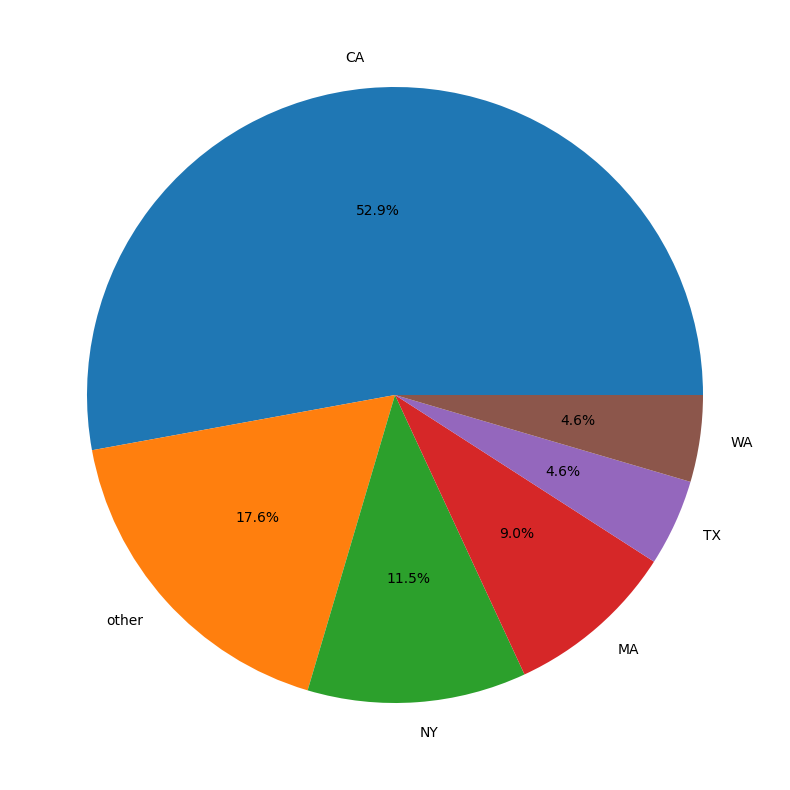

In [139]:
plt.figure(figsize=(12, 10))
state_count = df['State'].value_counts()
plt.pie(state_count, labels=state_count.index, autopct='%1.1f%%')
plt.show()

In [140]:
data1 = df[df['labels']==1].groupby(['category_grouped']).agg({'labels':'count'}).reset_index()
data1.columns=['category_grouped','total_success']

data2 = df[df['labels']==0].groupby(['category_grouped']).agg({'labels':'count'}).reset_index()
data2.columns=['category_grouped','total_closed']

data3=df.groupby(['category_grouped']).agg({'labels':'count'}).reset_index()
data3.columns=['category_grouped','total_startup']

data1= data1.merge(data2, on='category_grouped')
data1= data1.merge(data3, on='category_grouped')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate1 = data1.sort_values('success_rate', ascending=False)

In [141]:
most_succes_rate1

category_grouped  total_success  total_closed  total_startup  success_rate
1          analytics             16             3             19         84.21
12          security             15             4             19         78.95
5         enterprise             56            17             73         76.71
0        advertising             45            17             62         72.58
9    network_hosting             24            10             34         70.59
13     semiconductor             24            11             35         68.57
14          software            101            52            153         66.01
8             mobile             52            27             79         65.82
2            biotech             22            12             34         64.71
15               web             93            51            144         64.58
10             other             76            43            119         63.87
6        games_video             31            21             52         59.62
4          ecommerce             11            14             25         44.00
3          cleantech             10            13             23         43.48
7           hardware             11            16             27         40.74
11  public_relations             10            15             25         40.00

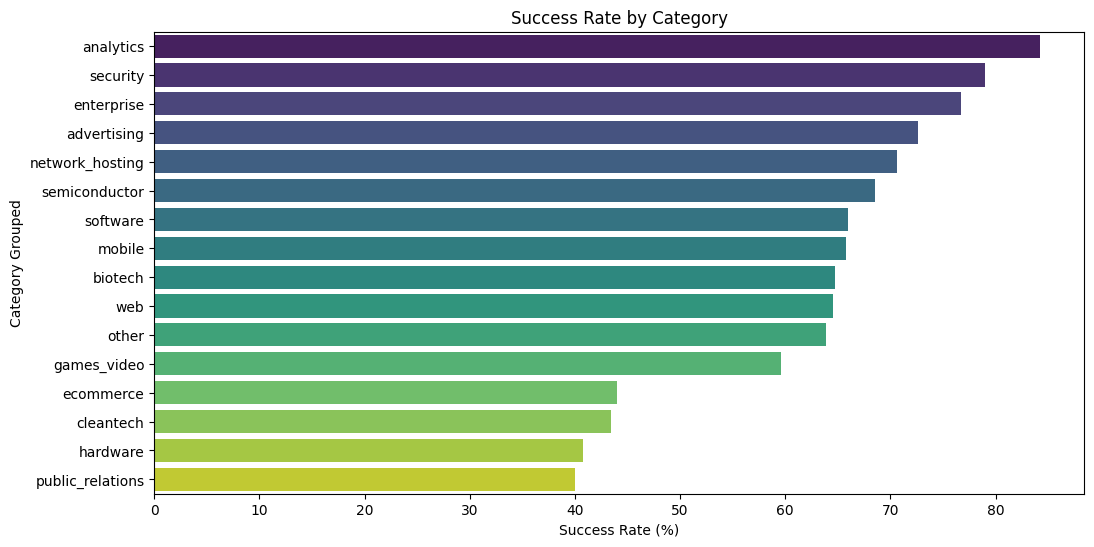

In [142]:
plt.figure(figsize=(12, 6))
sns.barplot(x='success_rate', y='category_grouped', data=most_succes_rate1, palette='viridis')
plt.title('Success Rate by Category')
plt.xlabel('Success Rate (%)')
plt.ylabel('Category Grouped')
plt.show()

In [143]:
category_funding_totals = df.groupby('category_grouped')['funding_total_usd'].sum().reset_index()

category_funding_totals.sort_values(by = 'funding_total_usd', ascending=False).reset_index()

index  category_grouped  funding_total_usd
0       8            mobile         7263750881
1      14          software         2657598865
2      10             other         1815793472
3      15               web         1729035436
4       2           biotech         1723699484
5       5        enterprise         1338882096
6       3         cleantech         1300284730
7      13     semiconductor         1105156970
8       0       advertising          918619012
9       6       games_video          844643530
10      7          hardware          773938873
11      9   network_hosting          735033389
12     12          security          373428570
13      4         ecommerce          329081922
14     11  public_relations          277066000
15      1         analytics          276415182

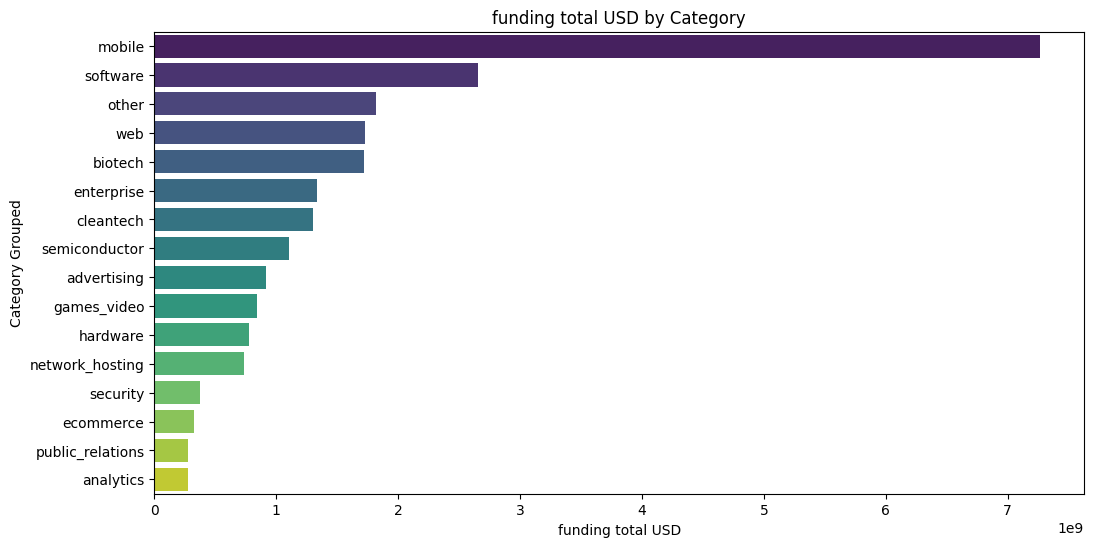

In [144]:
plt.figure(figsize=(12, 6))
sns.barplot(x='funding_total_usd', y='category_grouped', data=category_funding_totals.sort_values('funding_total_usd', ascending=False), palette='viridis')
plt.title('funding total USD by Category')
plt.xlabel('funding total USD')
plt.ylabel('Category Grouped')
plt.show()

## PRe Processing

In [145]:
df['status'] = np.where(df['status']=='acquired',1,0)

In [146]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Unnamed: 0, state_code, latitude, longitude, zip_code, id, city, Unnamed: 6, name, labels, founded_at, closed_at, first_funding_at, last_funding_at, age_first_funding_year, age_last_funding_year, age_first_milestone_year, age_last_milestone_year, relationships, funding_rounds, funding_total_usd, milestones, state_code.1, is_CA, is_NY, is_MA, is_TX, is_otherstate, category_code, is_software, is_web, is_mobile, is_enterprise, is_advertising, is_gamesvideo, is_ecommerce, is_biotech, is_consulting, is_othercategory, object_id, has_VC, has_angel, has_roundA, has_roundB, has_roundC, has_roundD, avg_participants, is_top500, status, multiple_rounds, funding_status, category_grouped, State]
Index: []

In [147]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [148]:
df=df.drop(df[df.age_first_funding_year<0].index)
df=df.drop(df[df.age_last_funding_year<0].index)
df=df.drop(df[df.age_first_milestone_year<0].index)
df=df.drop(df[df.age_last_milestone_year<0].index)

In [149]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


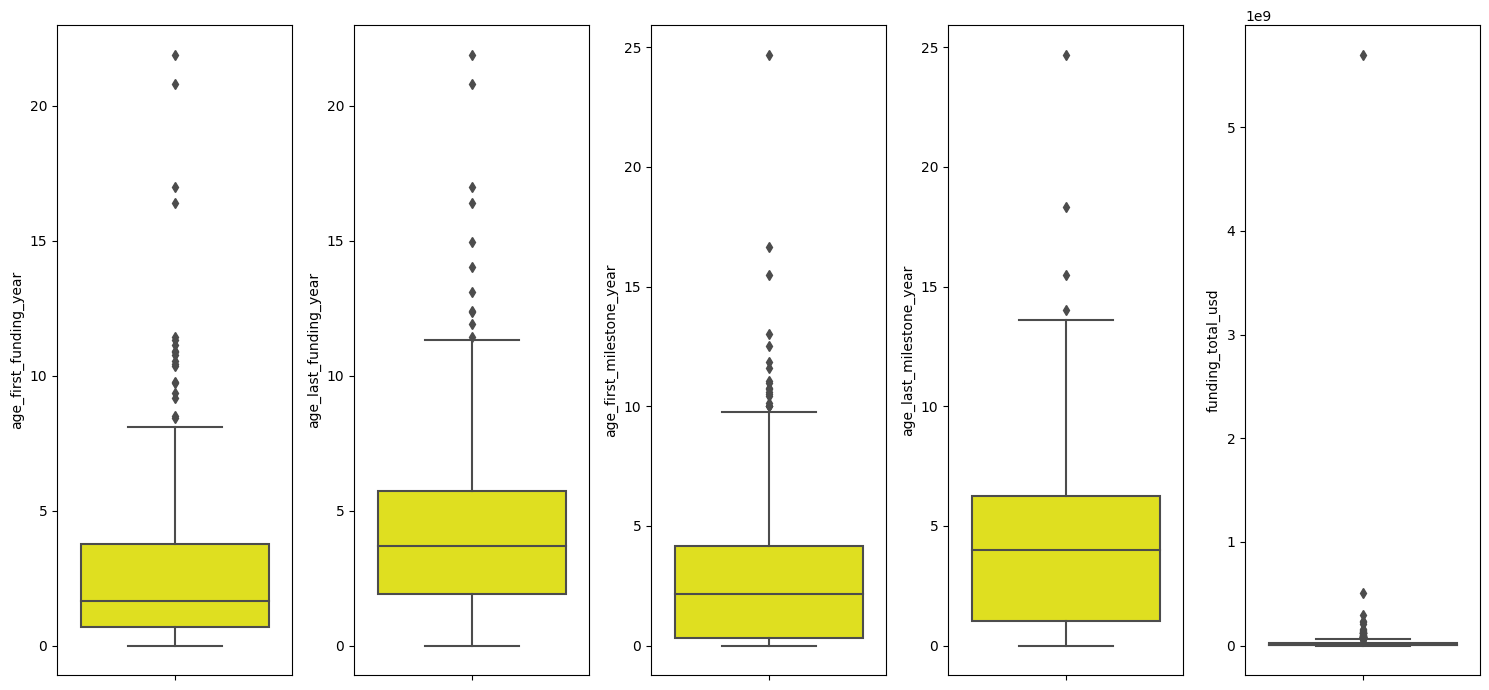

In [150]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='yellow', orient='')
    plt.tight_layout()

In [151]:
df["age_first_funding_year"] = np.log1p(df["age_first_funding_year"])
df["age_last_funding_year"] = np.log1p(df["age_last_funding_year"])
df["age_first_milestone_year"] = np.log1p(df["age_first_milestone_year"])
df["age_last_milestone_year"] = np.log1p(df["age_last_milestone_year"])
df["funding_total_usd"] = np.log1p(df["funding_total_usd"])

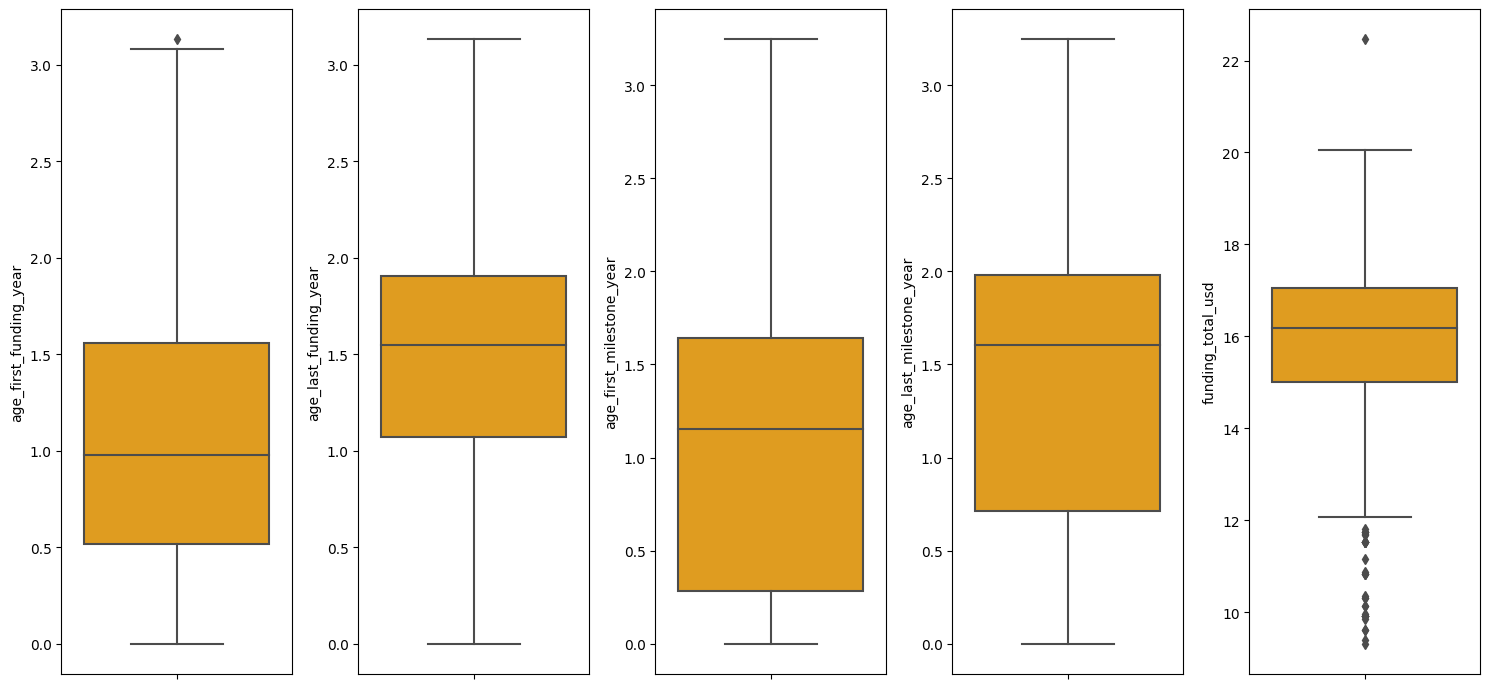

In [152]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='orange', orient='v')
    plt.tight_layout()

In [153]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) | (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df.head()

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  \
0      San Diego                     NaN        Bandsintown       1   
1      Los Gatos                     NaN          TriCipher       1   
2      San Diego      San Diego CA 92121              Plixi       1   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0   

  founded_at  closed_at first_funding_at last_funding_at  \
0   1/1/2007        NaN         4/1/2009        1/1/2010   
1   1/1/2000        NaN        2/14/2005      12/28/2009   
2  3/18/2009        NaN        3/30/2010       3/30/2010   
3   1/1/2002        NaN        2/17/2005       4/25/2007   
4   8/1/2010  10/1/2012         8/1/2010        4/1/2012   

   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                1.178440               1.386969                  1.734925   
1                1.812542               2.397650                  2.080129   
2                0.709463               0.709463                  0.899145   
3                1.418641               1.842944                  1.946296   
4                0.000000               0.981517                  0.037681   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                 2.041753              3               3          12.834684   
1                 2.080129              9               4          17.506887   
2                 1.164868              5               1          14.771022   
3                 1.946296              5               3          17.504390   
4                 0.037681              2               2          14.077876   

   milestones state_code.1  is_CA  is_NY  is_MA  is_TX  is_otherstate  \
0           3           CA      1      0      0      0              0   
1           1           CA      1      0      0      0              0   
2           2           CA      1      0      0      0              0   
3           1           CA      1      0      0      0              0   
4           1           CA      1      0      0      0              0   

  category_code  is_software  is_web  is_mobile  is_enterprise  \
0         music            0       0          0              0   
1    enterprise            0       0          0              1   
2           web            0       1          0              0   
3      software            1       0          0              0   
4   games_video            0       0          0              0   

   is_advertising  is_gamesvideo  is_ecommerce  is_biotech  is_consulting  \
0               0              0             0           0              0   
1               0              0             0           0              0   
2               0              0             0           0              0   
3               0              0             0           0              0   
4               0              1             0           0              0   

   is_othercategory object_id  has_VC  has_angel  has_roundA  has_roundB  \
0                 1    c:6669       0          1           0           0   
1                 0   c:16283       1          0           0           1   
2                 0   c:65620       0          0           1           0   
3                 0   c:42668       0          0           0           1   
4                 0   c:65806       1          1           0           0   

   has_roundC  has_roundD  avg_participants  is_top500  status  \
0           0           0   

In [154]:
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)
df.head()

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.056820    92101   c:6669   
1         204         CA  37.238916 -121.973718    95032  c:16283   
2        1001         CA  32.901049 -117.192656    92121  c:65620   
3         738         CA  37.320309 -122.050040    95014  c:42668   
4        1002         CA  37.779281 -122.419236    94105  c:65806   

            city              Unnamed: 6               name  labels  \
0      San Diego                     NaN        Bandsintown       1   
1      Los Gatos                     NaN          TriCipher       1   
2      San Diego      San Diego CA 92121              Plixi       1   
3      Cupertino      Cupertino CA 95014  Solidcore Systems       1   
4  San Francisco  San Francisco CA 94105     Inhale Digital       0   

  founded_at  closed_at first_funding_at last_funding_at  \
0   1/1/2007        NaN         4/1/2009        1/1/2010   
1   1/1/2000        NaN        2/14/2005      12/28/2009   
2  3/18/2009        NaN        3/30/2010       3/30/2010   
3   1/1/2002        NaN        2/17/2005       4/25/2007   
4   8/1/2010  10/1/2012         8/1/2010        4/1/2012   

   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                1.178440               1.386969                  1.734925   
1                1.812542               2.397650                  2.080129   
2                0.709463               0.709463                  0.899145   
3                1.418641               1.842944                  1.946296   
4                0.000000               0.981517                  0.037681   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                 2.041753              3               3          12.834684   
1                 2.080129              9               4          17.506887   
2                 1.164868              5               1          14.771022   
3                 1.946296              5               3          17.504390   
4                 0.037681              2               2          14.077876   

   milestones state_code.1  is_CA  is_NY  is_MA  is_TX  is_otherstate  \
0           3           CA      1      0      0      0              0   
1           1           CA      1      0      0      0              0   
2           2           CA      1      0      0      0              0   
3           1           CA      1      0      0      0              0   
4           1           CA      1      0      0      0              0   

  category_code  is_software  is_web  is_mobile  is_enterprise  \
0         music            0       0          0              0   
1    enterprise            0       0          0              1   
2           web            0       1          0              0   
3      software            1       0          0              0   
4   games_video            0       0          0              0   

   is_advertising  is_gamesvideo  is_ecommerce  is_biotech  is_consulting  \
0               0              0             0           0              0   
1               0              0             0           0              0   
2               0              0             0           0              0   
3               0              0             0           0              0   
4               0              1             0           0              0   

   is_othercategory object_id  has_VC  has_angel  has_roundA  has_roundB  \
0                 1    c:6669       0          1           0           0   
1                 0   c:16283       1          0           0           1   
2                 0   c:65620       0          0           1           0   
3                 0   c:42668       0          0           0           1   
4                 0   c:65806       1          1           0           0   

   has_roundC  has_roundD  avg_participants  is_top500  status  \
0           0           0   

In [155]:
len(df[(df["has_RoundABCD"] == 1)].index)

636

In [156]:
len(df[ (df['has_RoundABCD']  == 1) & (df['status']  == 1) ].index)

459

In [157]:
len(df)

840

In [158]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)

In [159]:
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_VC'] == 0) & (df['has_angel'] == 0), 1, 0)

In [160]:
df = df.drop(['state_code'],axis=1)
df = df.drop(['id'],axis=1)
df = df.drop(['Unnamed: 6'],axis=1)
df = df.drop(['category_code'],axis=1)
df = df.drop(['object_id'],axis=1)
df = df.drop(['zip_code'],axis=1)
df = df.drop(['founded_at'],axis=1)
df = df.drop(['closed_at'],axis=1)
df = df.drop(['first_funding_at'],axis=1)
df = df.drop(['last_funding_at'],axis=1)
df = df.drop(['city'],axis=1)
df = df.drop(['name'],axis=1)
df = df.drop(['Unnamed: 0'],axis=1)
df = df.drop(['latitude','longitude'],axis=1)
df = df.drop(['relationships'],axis=1)
df = df.drop(['state_code.1'],axis=1)
df = df.drop(['labels'],axis=1)

In [161]:
df = df.drop(['funding_status'],axis=1)
df = df.drop(['category_grouped'],axis=1)
df = df.drop(['State'],axis=1)

In [162]:
df.head()

age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                1.178440               1.386969                  1.734925   
1                1.812542               2.397650                  2.080129   
2                0.709463               0.709463                  0.899145   
3                1.418641               1.842944                  1.946296   
4                0.000000               0.981517                  0.037681   

   age_last_milestone_year  funding_rounds  funding_total_usd  milestones  \
0                 2.041753               3          12.834684           3   
1                 2.080129               4          17.506887           1   
2                 1.164868               1          14.771022           2   
3                 1.946296               3          17.504390           1   
4                 0.037681               2          14.077876           1   

   is_CA  is_NY  is_MA  is_TX  is_otherstate  is_software  is_web  is_mobile  \
0      1      0      0      0              0            0       0          0   
1      1      0      0      0              0            0       0          0   
2      1      0      0      0              0            0       1          0   
3      1      0      0      0              0            1       0          0   
4      1      0      0      0              0            0       0          0   

   is_enterprise  is_advertising  is_gamesvideo  is_ecommerce  is_biotech  \
0              0               0              0             0           0   
1              1               0              0             0           0   
2              0               0              0             0           0   
3              0               0              0             0           0   
4              0               0              1             0           0   

   is_consulting  is_othercategory  has_VC  has_angel  has_roundA  has_roundB  \
0              0                 1       0          1           0           0   
1              0                 0       1          0           0           1   
2              0                 0       0          0           1           0   
3              0                 0       0          0           0           1   
4              0                 0       1          1           0           0   

   has_roundC  has_roundD  avg_participants  is_top500  status  \
0           0           0            1.0000          0       1   
1           1           1            4.7500          1       1   
2           0           0            4.0000          1       1   
3           1           1            3.3333          1       1   
4           0           0            1.0000          1       0   

   multiple_rounds  has_RoundABCD  has_Investor  has_Seed  invalid_startup  
0                1              0             1         1                0  
1                4              1             1         0                0  
2                1              1             0         0                0  
3                3              1             0         0                0  
4                2              0             1         1                0

In [163]:
df.shape

(840, 36)

### Due to a small dataset, we decided to keep the outliers for now.

# Anamoly Detection using KNN

# KNN for anomaly detection (outside of class scope)

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


In [165]:
df_scaled

age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                  0.252339              -0.127769                  0.882041   
1                  1.232424               1.530423                  1.332734   
2                 -0.472523              -1.239330                 -0.209140   
3                  0.623600               0.620334                  1.158004   
4                 -1.569088              -0.792981                 -1.333853   
..                      ...                    ...                       ...   
835               -0.924157              -1.718736                 -0.785182   
836                1.692906               1.411344                  1.158004   
837                1.909900               1.289589                  1.623887   
838               -0.696291              -0.198887                 -0.645801   
839                0.619479              -0.080180                  0.718912   

     age_last_milestone_year  funding_rounds  funding_total_usd  milestones  \
0                   0.836674        0.484302          -1.680379    0.890045   
1                   0.883269        1.196761           0.935919   -0.618810   
2                  -0.227995       -0.940615          -0.596086    0.135617   
3                   0.720775        0.484302           0.934520   -0.618810   
4                  -1.596569       -0.228156          -0.984228   -0.618810   
..                       ...             ...                ...         ...   
835                 0.433226       -0.940615          -1.077773    0.135617   
836                 0.720775        0.484302           1.081437   -0.618810   
837                 1.154031       -0.940615           0.987891   -0.618810   
838                 0.271187       -0.228156           0.403646    0.135617   
839                 0.312435       -0.940615           0.546378   -0.618810   

        is_CA     is_NY     is_MA     is_TX  is_otherstate  is_software  \
0    0.937654 -0.359211 -0.310815 -0.220656      -0.527768    -0.458666   
1    0.937654 -0.359211 -0.310815 -0.220656      -0.527768    -0.458666   
2    0.937654 -0.359211 -0.310815 -0.220656      -0.527768    -0.458666   
3    0.937654 -0.359211 -0.310815 -0.220656      -0.527768     2.180235   
4    0.937654 -0.359211 -0.310815 -0.220656      -0.527768    -0.458666   
..        ...       ...       ...       ...            ...          ...   
835  0.937654 -0.359211 -0.310815 -0.220656      -0.527768    -0.458666   
836 -1.066492 -0.359211  3.217352 -0.220656      -0.527768    -0.458666   
837  0.937654 -0.359211 -0.310815 -0.220656      -0.527768    -0.458666   
838  0.937654 -0.359211 -0.310815 -0.220656      -0.527768     2.180235   
839  0.937654 -0.359211 -0.310815 -0.220656      -0.527768    -0.458666   

       is_web  is_mobile  is_enterprise  is_advertising  is_gamesvideo  \
0   -0.414184  -0.296788      -0.287183       -0.272339      -0.240696   
1   -0.414184  -0.296788       3.482097       -0.272339      -0.240696   
2    2.414388  -0.296788      -0.287183       -0.272339      -0.240696   
3   -0.414184  -0.296788      -0.287183       -0.272339      -0.240696   
4   -0.414184  -0.296788      -0.287183       -0.272339       4.154620   
..        ...        ...            ...             ...            ...   
835 -0.414184  -0.296788      -0.287183        3.671888      -0.240696   
836 -0.414184  -0.296788      -0.287183       -0.272339      -0.240696   
837 -0.414184  -0.296788      -0.287183       -0.272339      -0.240696   
838 -0.414184  -0.296788      -0.287183       -0.272339      -0.240696   
839 -0.414184  -0.296788      -0.287183       -0.272339      -0.240696   

     is_ecommerce  is_biotech  is_consulting  is_othercategory    has_VC  \
0       -0.171499   -0.202218      -0.059868          1.433369 -0.701432   
1       -0.171499   -0.202218      -0.059868         -0.697657  1.425655   
2       -0.171499   -0.202218      -0.059868         -0.697657 -0.701432   
3

In [166]:
from sklearn.neighbors import NearestNeighbors

n_neighbors = 5
knn_model = NearestNeighbors(n_neighbors=n_neighbors)


knn_model.fit(df_scaled)

distances, indices = knn_model.kneighbors(df_scaled)

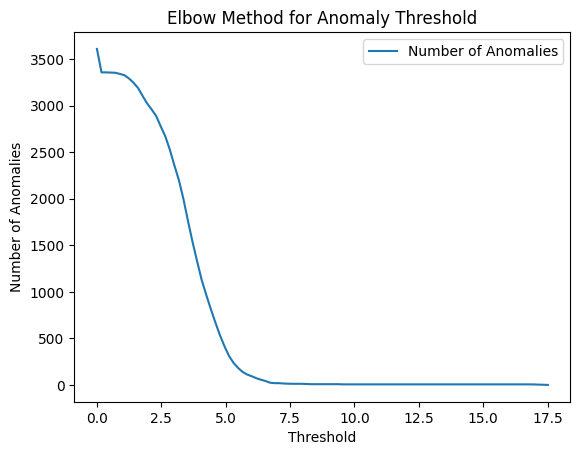

In [167]:
# Calculate anomalies for different threshold values
thresholds = np.linspace(np.min(distances), np.max(distances), 100)
num_anomalies = [np.sum(distances > t) for t in thresholds]

# Plot the number of anomalies versus threshold values
plt.plot(thresholds, num_anomalies, label='Number of Anomalies')
plt.xlabel('Threshold')
plt.ylabel('Number of Anomalies')
plt.title('Elbow Method for Anomaly Threshold')
plt.legend()
plt.show()

From this elbow plot we can see thay the anomaly threshold should be around 6

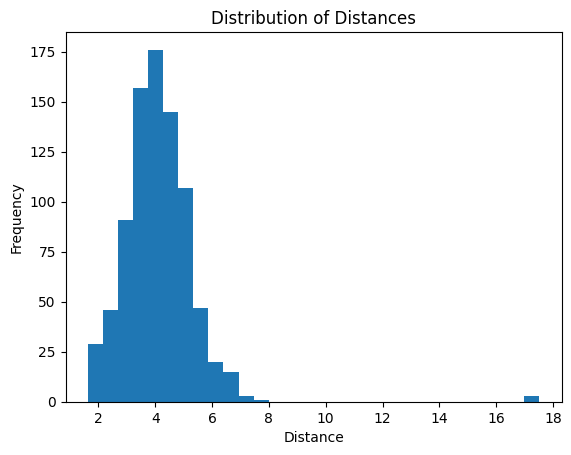

In [168]:
# Visualize the distribution of distances

plt.hist(distances[:, n_neighbors - 1], bins=30)
plt.title('Distribution of Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# Choose a threshold (adjust as needed)
anomaly_threshold = 5

# Identify anomalies based on the threshold
anomalies = distances[:, n_neighbors - 1] > anomaly_threshold

# Add an 'is_anomaly' column to the original DataFrame
df['is_anomaly'] = anomalies.astype(int)

In [169]:
df['is_anomaly']

0      0
1      0
2      0
3      0
4      0
      ..
918    0
919    0
920    1
921    0
922    0
Name: is_anomaly, Length: 840, dtype: int64

It doesn't seem that continuous variables have clear indicators towards anomalies.

In [170]:
anomaly_rows = df[df['is_anomaly'] == 1]

In [171]:
anomaly_rows.shape[0]

157

In [172]:
anomaly_rows

age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
8                  1.523074               2.494221                  2.197836   
20                 1.167423               1.565758                  1.626826   
28                 1.254704               1.710459                  1.780277   
38                 0.154522               1.294535                  0.475116   
39                 0.000000               1.932115                  1.577142   
..                      ...                    ...                       ...   
913                0.828726               0.828726                  2.094736   
915                1.813439               1.813439                  1.425900   
916                0.000000               1.595096                  1.364841   
917                1.891620               2.278180                  2.251723   
920                2.250860               2.250860                  2.303135   

     age_last_milestone_year  funding_rounds  funding_total_usd  milestones  \
8                   2.397395               3          16.082469           4   
20                  2.351242               2          15.286835           3   
28                  1.898624               5          19.517625           2   
38                  1.749322               3          14.415952           3   
39                  2.096422               7          17.213871           5   
..                       ...             ...                ...         ...   
913                 2.094736               1          14.508658           1   
915                 2.252586               1          14.508658           2   
916                 1.907199               3          16.705882           3   
917                 2.278180               5          18.623622           2   
920                 2.303135               1          17.599700           1   

     is_CA  is_NY  is_MA  is_TX  is_otherstate  is_software  is_web  \
8        0      0      1      0              0            0       0   
20       0      0      0      1              0            1       0   
28       0      0      0      1              0            0       1   
38       1      0      0      0              0            0       0   
39       0      1      0      0              0            0       0   
..     ...    ...    ...    ...            ...          ...     ...   
913      0      0      0      1              0            0       1   
915      0      0      0      0              1            0       0   
916      0      1      0      0              0            0       0   
917      0      0      0      0              1            0       0   
920      1      0      0      0              0            0       0   

     is_mobile  is_enterprise  is_advertising  is_gamesvideo  is_ecommerce  \
8            1              0               0              0             0   
20           0              0               0              0             0   
28           0              0               0              0             0   
38           0              0               0              0             1   
39           0              0               1              0             0   
..         ...            ...             ...            ...           ...   
913          0              0               0              0             0   
915          0              0               1              0             0   
916          0              0               1              0             0   
917          1              0               0              0             0   
920          0              0               0              0             0   

     is_biotech  is_consulting  is_othercategory  has_VC  has_angel  \
8             0              0                 0       1          0   
20            0              0                 0       0          1   
28            0              0                 0       1          0   
38            0      

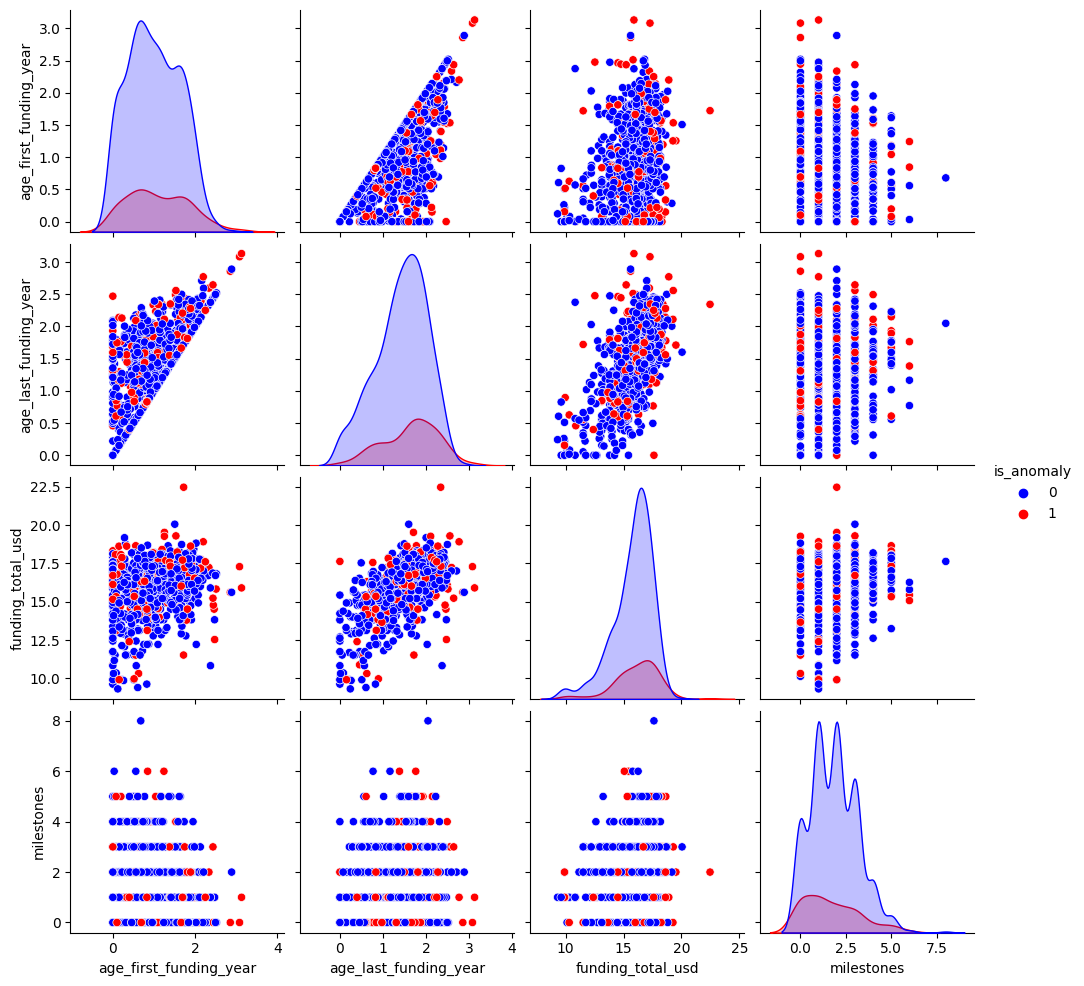

In [173]:
# Select a subset of columns for visualization
selected_columns = ['age_first_funding_year', 'age_last_funding_year', 'funding_total_usd', 'milestones']

# Add 'is_anomaly' to the selected columns
selected_columns.append('is_anomaly')

# Create a pairplot
sns.pairplot(df[selected_columns], hue='is_anomaly', palette={0: 'blue', 1: 'red'})
plt.show()

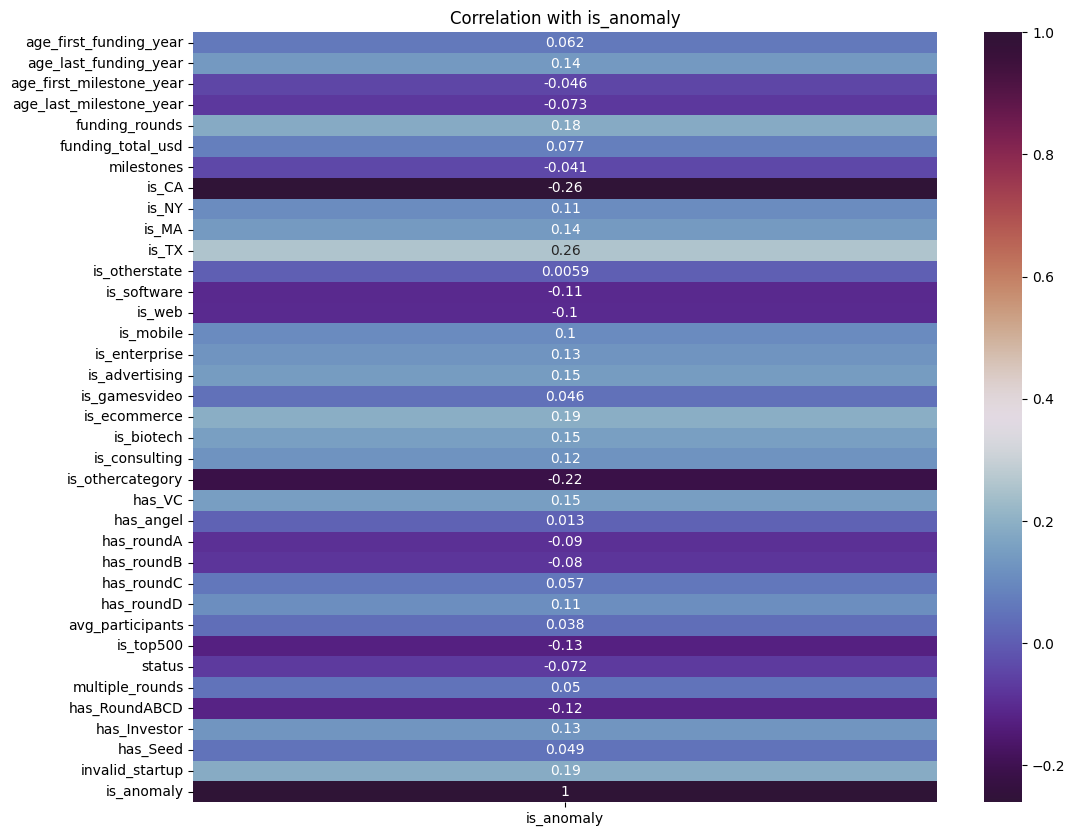

In [174]:
# Check correlation with 'is_anomaly'
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['is_anomaly']], annot=True, cmap='twilight_shifted')
plt.title('Correlation with is_anomaly')
plt.show()

From this heap map we can see that the anomalies are ones that have no funding (invalid_startup), or have a particularly high number of fundign rounds, ecommerce, biotech or are texas based.
Oppositely the values 'is_CA', 'is_web', 'is_software', 'has_RoundABCD', is_othercategory, and 'is_top500' have negative correlations with 'is_anomaly'; thus implying they have a higher chance of being an anomaly in this dataset as well

In [175]:
df.shape

(840, 37)

In [176]:
from sklearn.model_selection import train_test_split
X = df.drop('status', axis = 1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Logistic Regression

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer

In [178]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [179]:
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

Logistic Regression with Default Parameters:

 Confusion Matrix:


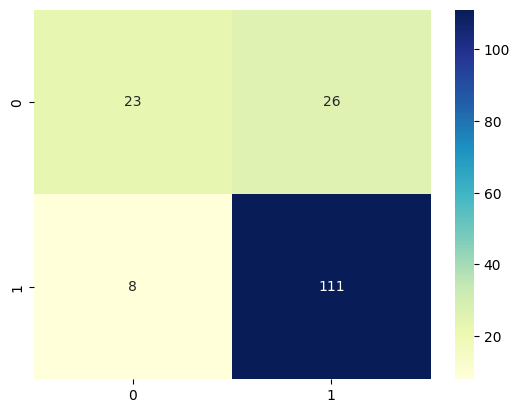


Accuracy: 0.7976190476190477
Precision: 0.8102189781021898
Recall: 0.9327731092436975
F1 Score: 0.8671875


In [180]:
print("Logistic Regression with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_lr, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

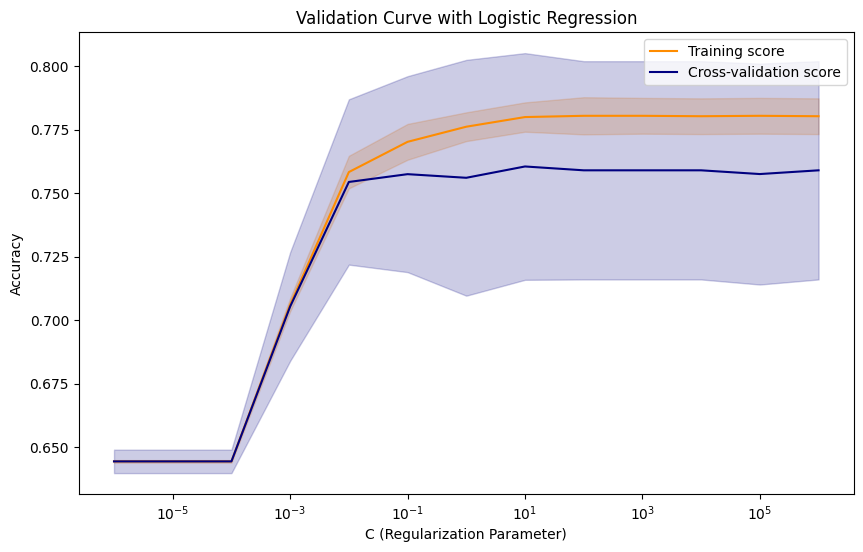

In [181]:
from sklearn.model_selection import validation_curve


param_range = np.logspace(-6, 6, 13)

# Create the validation curve
train_scores, test_scores = validation_curve(
    lr,
    X_train, y_train,
    param_name="C",
    param_range=param_range,
    scoring=make_scorer(accuracy_score),
    cv=10,
    n_jobs=-1
)

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange"
)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy")
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy"
)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


# Logstic with grid

In [182]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10,100, 200, 500,1000,2000]
}

In [183]:
lr_grid = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(lr_grid, param_grid, cv=5)
grid_search_lr.fit(X_train, y_train)
y_pred_grid_lr = grid_search_lr.predict(X_test)

Streaming output truncated to the last 5000 lines.
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resul

In [184]:
grid_search_lr

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [10, 100, 200, 500, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [185]:
print(grid_search_lr.best_estimator_)

LogisticRegression(C=0.01, random_state=42, solver='sag')


In [186]:
conf_mat_grid_lr = confusion_matrix(y_test, y_pred_grid_lr)
accuracy_grid_lr = accuracy_score(y_test, y_pred_grid_lr)
precision_grid_lr = precision_score(y_test, y_pred_grid_lr)
recall_grid_lr = recall_score(y_test, y_pred_grid_lr)
f1_grid_lr = f1_score(y_test, y_pred_grid_lr)

Logistic Regression with Default Parameters:

 Confusion Matrix:


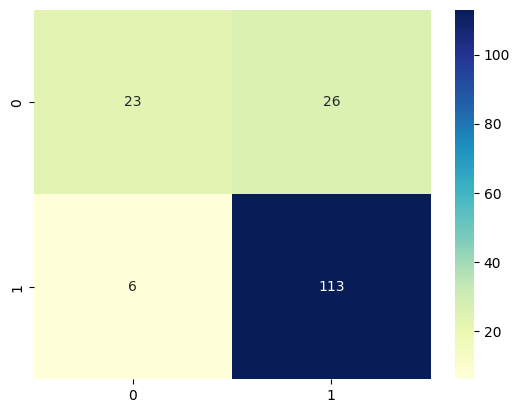


Accuracy: 0.8095238095238095
Precision: 0.8129496402877698
Recall: 0.9495798319327731
F1 Score: 0.875968992248062


In [187]:
print("Logistic Regression with HyperTuned Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_grid_lr, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_grid_lr)
print("Precision:", precision_grid_lr)
print("Recall:", recall_grid_lr)
print("F1 Score:", f1_grid_lr)

In [188]:
from sklearn.model_selection import learning_curve

In [189]:
best_estimator = grid_search_lr.best_estimator_

In [190]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_estimator,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

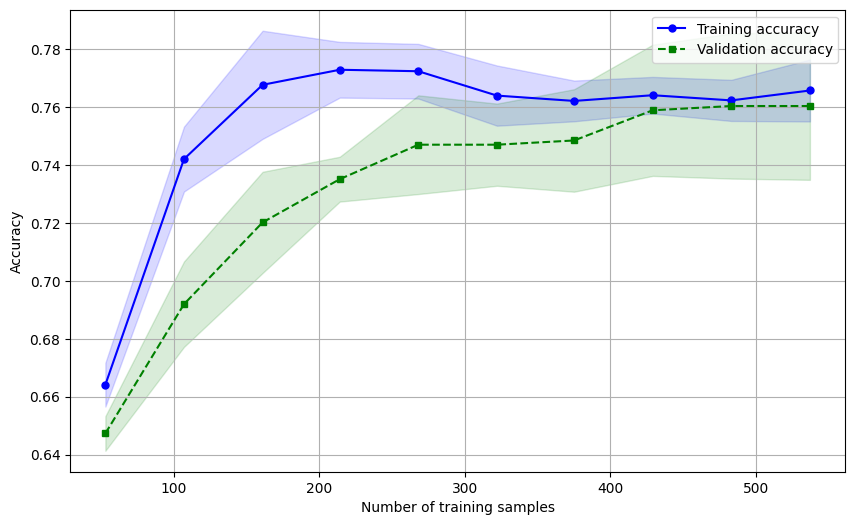

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Ensamble
## AdaBoostClassifier

In [192]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [193]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

In [194]:
conf_mat_ada = confusion_matrix(y_test, y_pred_adaboost)
accuracy_ada = accuracy_score(y_test, y_pred_adaboost)
precision_ada = precision_score(y_test, y_pred_adaboost)
recall_ada = recall_score(y_test, y_pred_adaboost)
f1_ada = f1_score(y_test, y_pred_adaboost)

AdaBoost Classifier with Default Parameters:

 Confusion Matrix:


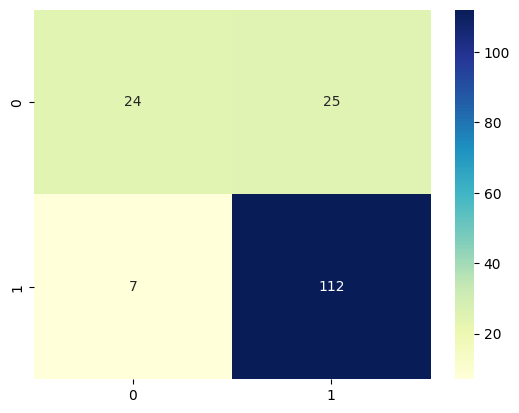


Accuracy: 0.8095238095238095
Precision: 0.8175182481751825
Recall: 0.9411764705882353
F1 Score: 0.8749999999999999


In [195]:
print("AdaBoost Classifier with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_ada, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_ada)
print("Precision:", precision_ada)
print("Recall:", recall_ada)
print("F1 Score:", f1_ada)

## AdaBoostClassifier Gridsearch

In [196]:
param_grid_adaboost = {'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 0.01, 0.001]}

In [197]:
grid_search_adaboost = GridSearchCV(adaboost, param_grid_adaboost, scoring='precision')

In [198]:
grid_search_adaboost.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [10, 50, 100]},
             scoring='precision')

In [199]:
y_pred_adaboost = grid_search_adaboost.best_estimator_.predict(X_test)

In [200]:
grid_search_adaboost.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [201]:
conf_mat_grid_ada = confusion_matrix(y_test, y_pred_adaboost)
accuracy_grid_ada = accuracy_score(y_test, y_pred_adaboost)
precision_grid_ada = precision_score(y_test, y_pred_adaboost)
recall_grid_ada = recall_score(y_test, y_pred_adaboost)
f1_grid_ada = f1_score(y_test, y_pred_adaboost)

AdaBoost Classifier with Default Parameters:

 Confusion Matrix:


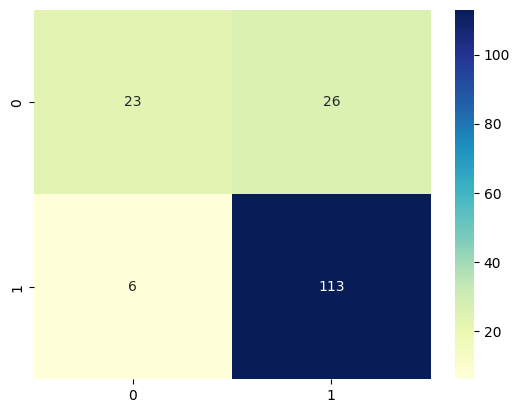


Accuracy: 0.7916666666666666
Precision: 0.8088235294117647
Recall: 0.9243697478991597
F1 Score: 0.8627450980392157


In [202]:
print("AdaBoost Classifier with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_grid_lr, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_grid_ada)
print("Precision:", precision_grid_ada)
print("Recall:", recall_grid_ada)
print("F1 Score:", f1_grid_ada)

## XgbosstClassifier

In [203]:

clf_xgboost = XGBClassifier()
clf_xgboost.fit(X_train, y_train)
y_pred_xgboost = clf_xgboost.predict(X_test)

In [204]:
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgboost)
accuracy_xgb = accuracy_score(y_test, y_pred_xgboost)
precision_xgb = precision_score(y_test, y_pred_xgboost)
recall_xgb = recall_score(y_test, y_pred_xgboost)
f1_xgb = f1_score(y_test, y_pred_xgboost)

XgbosstClassifier with Default Parameters:

 Confusion Matrix:


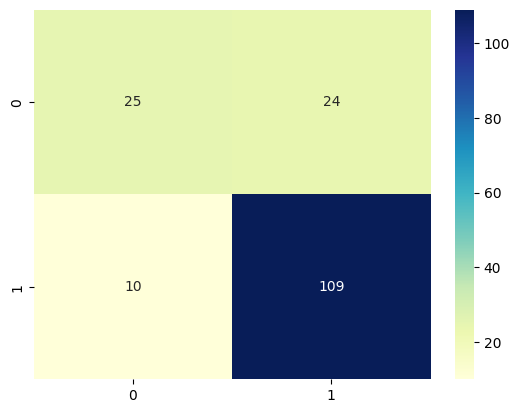


Accuracy: 0.7976190476190477
Precision: 0.8195488721804511
Recall: 0.9159663865546218
F1 Score: 0.8650793650793651


In [205]:
print("XgbosstClassifier with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_xgb, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

## XgbosstClassifier Gridsearch

In [206]:
param_grid_xgboost = {'n_estimators': [10, 50, 100], 'max_depth': [2, 4, 6], 'learning_rate': [0.1, 0.01, 0.001]}

In [207]:
clf_xgboost = XGBClassifier()
grid_search_xgboost = GridSearchCV(clf_xgboost, param_grid_xgboost, scoring='precision')
grid_search_xgboost.fit(X_train, y_train)
y_pred_grid_xgboost = grid_search_xgboost.best_estimator_.predict(X_test)

In [208]:
conf_mat_grid_xgboost = confusion_matrix(y_test, y_pred_grid_xgboost)
accuracy_grid_xgboost = accuracy_score(y_test, y_pred_grid_xgboost)
precision_grid_xgboost = precision_score(y_test, y_pred_grid_xgboost)
recall_grid_xgboost = recall_score(y_test, y_pred_grid_xgboost)
f1_grid_xgboost = f1_score(y_test, y_pred_grid_xgboost)

XgbosstClassifier with Default Parameters:

 Confusion Matrix:


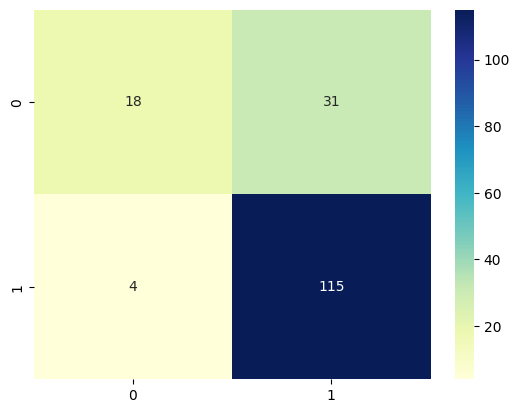


Accuracy: 0.7916666666666666
Precision: 0.7876712328767124
Recall: 0.9663865546218487
F1 Score: 0.8679245283018869


In [209]:
print("XgbosstClassifier with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_grid_xgboost, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_grid_xgboost)
print("Precision:", precision_grid_xgboost)
print("Recall:", recall_grid_xgboost)
print("F1 Score:", f1_grid_xgboost)

#! pip install lightgbm

## LGBMClassifier

In [210]:
import lightgbm as lgb

In [211]:
params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'num_leaves': 63,
    'max_depth': -1,
}

In [212]:
lgbm = lgb.LGBMClassifier(**params)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 433, number of negative: 239
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 672, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.644345 -> initscore=0.594274
[LightGBM] [Info] Start training from score 0.594274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [213]:
conf_mat_lgbm = confusion_matrix(y_test, y_pred_lgbm)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)

LGBMClassifier with Default Parameters:

 Confusion Matrix:


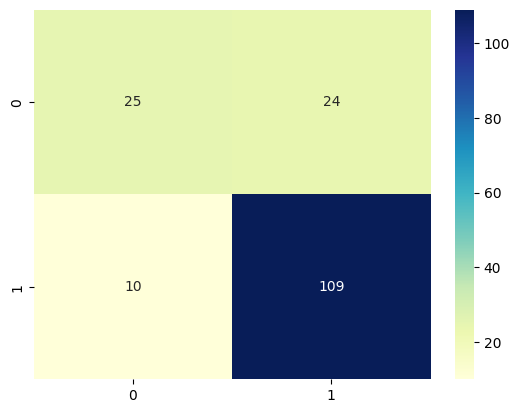


Accuracy: 0.7976190476190477
Precision: 0.8195488721804511
Recall: 0.9159663865546218
F1 Score: 0.8650793650793651


In [214]:
print("LGBMClassifier with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_lgbm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_lgbm)
print("Precision:", precision_lgbm)
print("Recall:", recall_lgbm)
print("F1 Score:", f1_lgbm)

## lgbmClassifier Grdisearch

In [215]:
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, None],
}

In [216]:
clf_lgbm = lgb.LGBMClassifier()
grid_search_lgbm = GridSearchCV(clf_lgbm, param_grid_lgbm, scoring='precision')
grid_search_lgbm.fit(X_train, y_train)

# Evaluate the classifier
y_pred_grid_lgbm = grid_search_lgbm.best_estimator_.predict(X_test)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [217]:
conf_mat_grid_lgbm = confusion_matrix(y_test, y_pred_grid_lgbm)
accuracy_grid_lgbm = accuracy_score(y_test, y_pred_grid_lgbm)
precision_grid_lgbm = precision_score(y_test, y_pred_grid_lgbm)
recall_grid_lgbm = recall_score(y_test, y_pred_grid_lgbm)
f1_grid_lgbm = f1_score(y_test, y_pred_grid_lgbm)

LGBMClassifier with Default Parameters:

 Confusion Matrix:


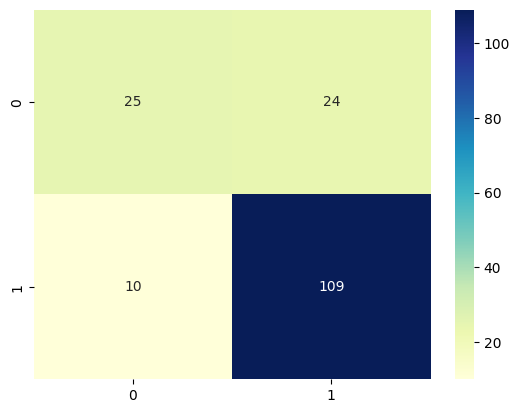


Accuracy: 0.7976190476190477
Precision: 0.8195488721804511
Recall: 0.9159663865546218
F1 Score: 0.8650793650793651


In [218]:
print("LGBMClassifier with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_grid_lgbm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_grid_lgbm)
print("Precision:", precision_grid_lgbm)
print("Recall:", recall_grid_lgbm)
print("F1 Score:", f1_grid_lgbm)

## Decision tree

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [239]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_val_pred_dt = dt_classifier.predict(X_test)

In [240]:
conf_mat_dt = confusion_matrix(y_test, y_val_pred_dt)
accuracy_dt = accuracy_score(y_test, y_val_pred_dt)
precision_dt = precision_score(y_test, y_val_pred_dt)
recall_dt = recall_score(y_test, y_val_pred_dt)
f1_dt = f1_score(y_test, y_val_pred_dt)

Logistic Regression with Default Parameters:

 Confusion Matrix:


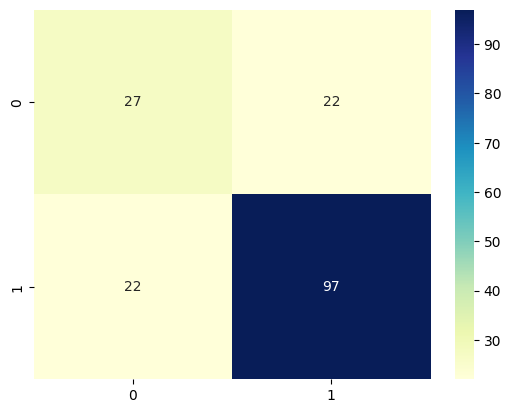


Accuracy: 0.7380952380952381
Precision: 0.8151260504201681
Recall: 0.8151260504201681
F1 Score: 0.8151260504201681


In [241]:
print("Dec.Tree with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_dt, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

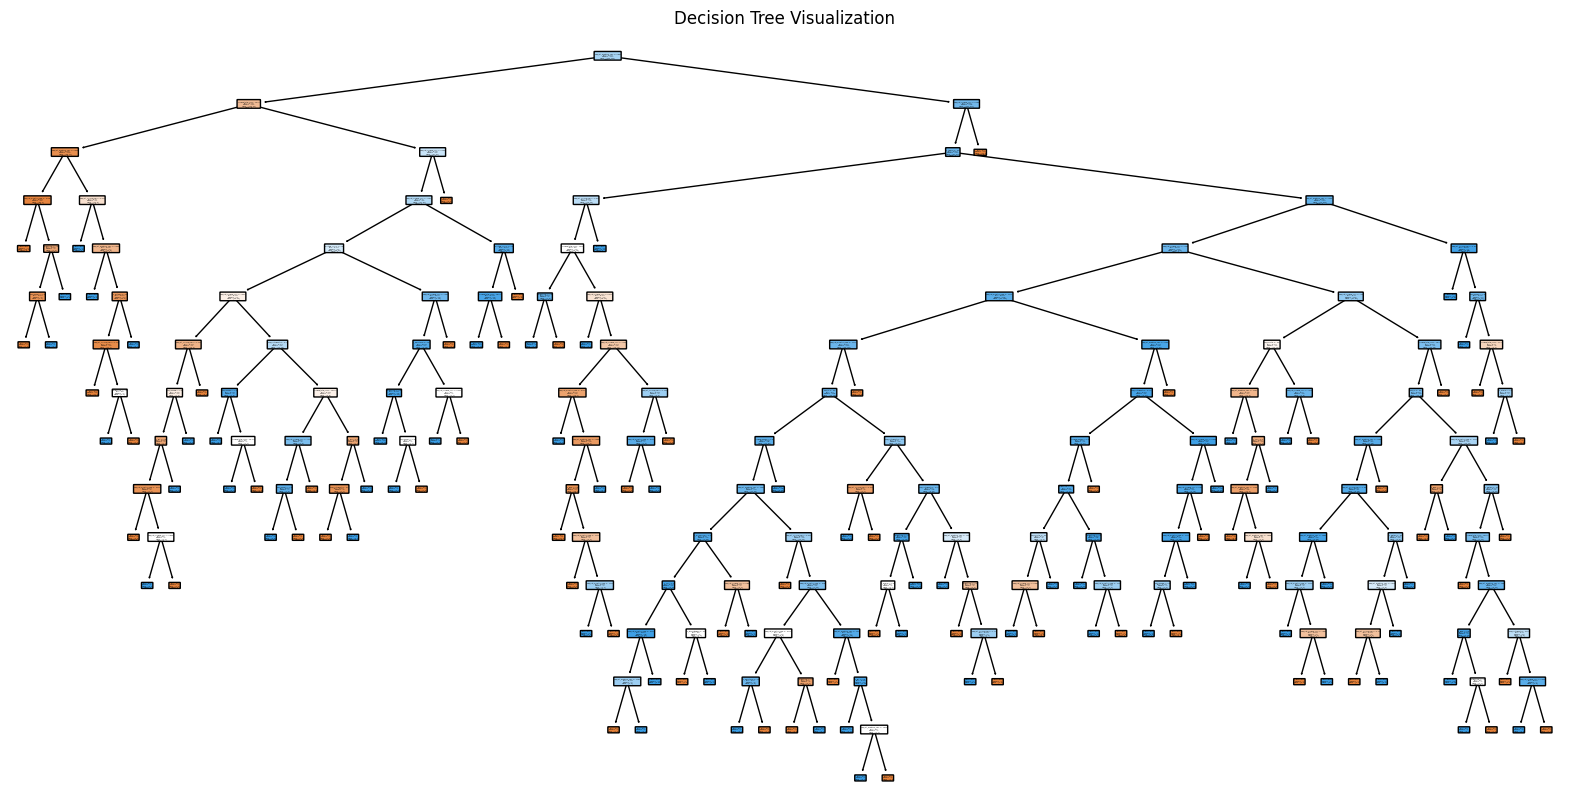

In [242]:
from sklearn.tree import plot_tree

# Convert the Index to a list
feature_names = X.columns.tolist()

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=feature_names, class_names=['0', '1'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
#plt.savefig('decision_tree.png') #the visualization is really big so i exported to evaluate further
#still too small...
plt.show()

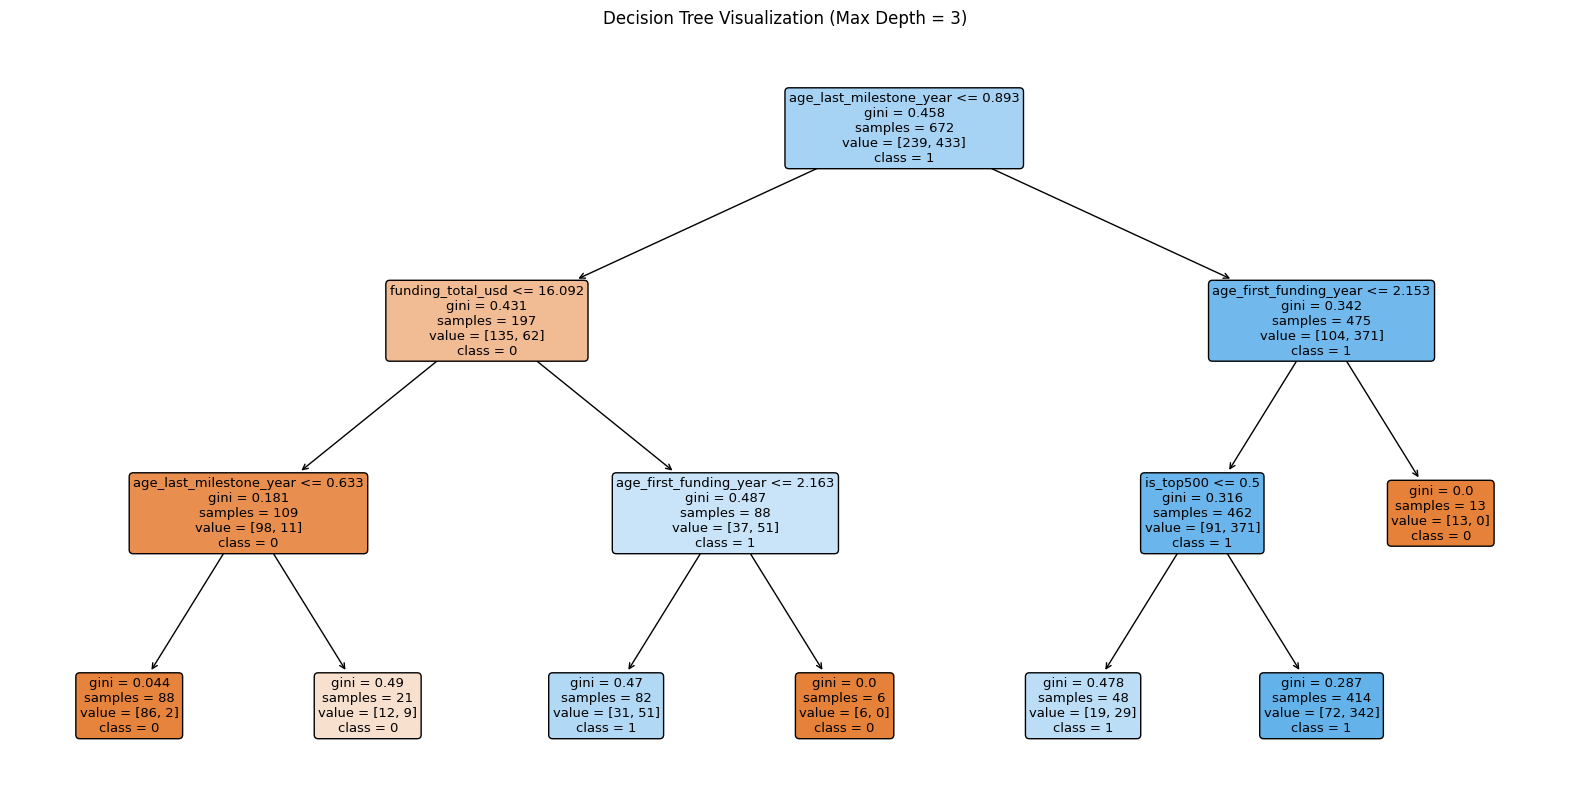

In [244]:
#lets adjust max depth

# Create and fit the decision tree
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Convert the Index to a list
feature_names = X.columns.tolist()

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=feature_names, class_names=['0', '1'], filled=True, rounded=True)
plt.title('Decision Tree Visualization (Max Depth = 3)')
plt.show()

In [337]:
# Predict on the validation set
y_val_pred = dt_classifier.predict(X_test)

accuracy_md3 = accuracy_score(y_test, y_val_pred)
classification_rep = classification_report(y_test, y_val_pred)

print(f"Validation Accuracy: {accuracy:.2f}")
print("Classification Report on Validation Set:")
print(classification_rep)

#y_test_pred = dt_classifier.predict(X_test)
#test_accuracy = accuracy_score(y_test, y_test_pred)
#test_classification_rep = classification_report(y_test, y_test_pred)

#print(f"\nTest Accuracy: {test_accuracy:.2f}")
#print("Classification Report on Test Set:")
#print(test_classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


ValueError: ignored

Logistic Regression with Default Parameters:

 Confusion Matrix:


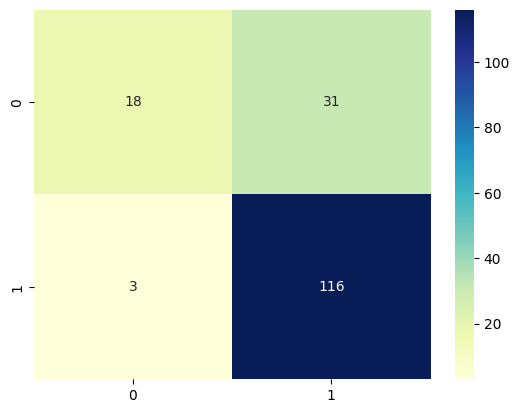


Accuracy: 0.7976190476190477


In [253]:
print("Decision Tree with adjusted max depth=3:")
print("\n Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_val_pred), annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy)

### Lets perform gridsearch with stratified cross validation

In [332]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


params = {
    'min_samples_split': [5, 10, 20, 30, 40, 50],
    'max_depth': [1, 2, 3, None],
}

# Initiate grid search
dt = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

gs = GridSearchCV(estimator=dt, param_grid=params, scoring='precision', cv=cv, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, None],
                         'min_samples_split': [5, 10, 20, 30, 40, 50]},
             scoring='precision')

In [336]:
# Best estimator and its parameters
best_estimator = gs.best_estimator_
best_params = gs.best_params_

print("Best parameters:", best_params)

# Evaluate on test set
pred = best_estimator.predict(X_test)
accuracy_grid_dt = metrics.accuracy_score(y_test, pred)
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Classification Report:\n", metrics.classification_report(y_test, pred))

Best parameters: {'max_depth': 1, 'min_samples_split': 5}
Accuracy: 0.8095238095238095
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.51      0.61        49
           1       0.82      0.93      0.87       119

    accuracy                           0.81       168
   macro avg       0.79      0.72      0.74       168
weighted avg       0.80      0.81      0.80       168



Decision Tree (GridS Tuned):

 Confusion Matrix:


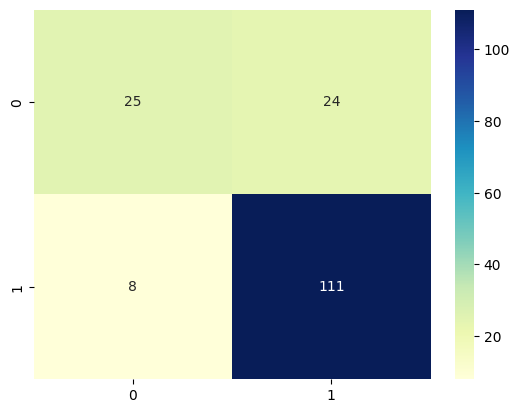


Accuracy: 0.8095238095238095


In [331]:
print("Decision Tree (GridS Tuned):")
print("\n Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, pred), annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", metrics.accuracy_score(y_test, pred))

## Learning curve


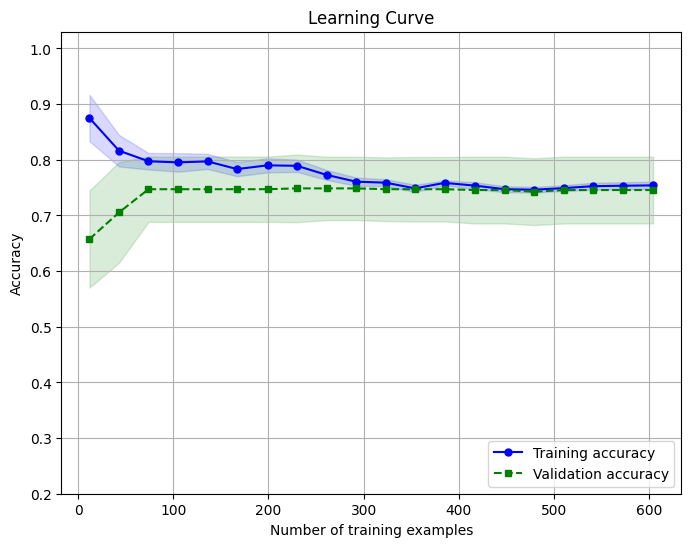

In [248]:
"""from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt"""

# Learning curve
best_estimator = gs.best_estimator_

train_sizes, train_scores, test_scores = learning_curve(estimator=best_estimator,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.02, 1.0, 20),
                                                        cv=cv,
                                                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=[8, 6])
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.20, 1.03])
plt.title('Learning Curve')
plt.show()


Both the training and validation curves show improvement and eventually converge to a stable value of ~350 training examples. This indicates that the model is learning from the training data and generalizing well to new, unseen data. interestingly, even on 50 examples, the validation accuracy is already at 70% potentially indicating that this dataset might be relatively simple and that the decision boundary is as well. Gridsearch tuning did, however prove that min split of 5 is most efficient indicating that there is a certain model complexity threshold.


## Randomforest

In [258]:
from sklearn.ensemble import RandomForestClassifier

In [259]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [260]:
conf_mat_rf = confusion_matrix(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

Logistic Regression with Default Parameters:

 Confusion Matrix:


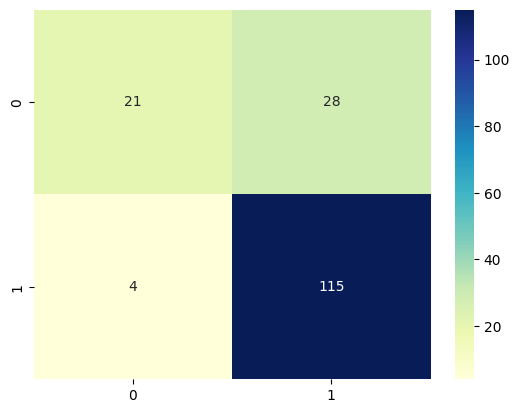


Accuracy: 0.8095238095238095
Precision: 0.8041958041958042
Recall: 0.9663865546218487
F1 Score: 0.8778625954198472


In [261]:
print("Random Forest with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_rf, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

## Randomforest Gridsearch

In [262]:
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False]
}

In [263]:
clf = RandomForestClassifier()
grid_search_rf = GridSearchCV(clf, param_grid, scoring='f1')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 6, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='f1')

In [264]:
best_parameters = grid_search_rf.best_params_
best_estimator = grid_search_rf.best_estimator_

In [265]:
y_pred = best_estimator.predict(X_test)

In [266]:
conf_mat_grid_rf = confusion_matrix(y_test, y_pred)
accuracy_grid_rf = accuracy_score(y_test, y_pred)
precision_grid_rf = precision_score(y_test, y_pred)
recall_grid_rf = recall_score(y_test, y_pred)
f1_grid_rf = f1_score(y_test, y_pred)

Logistic Regression with Default Parameters:

 Confusion Matrix:


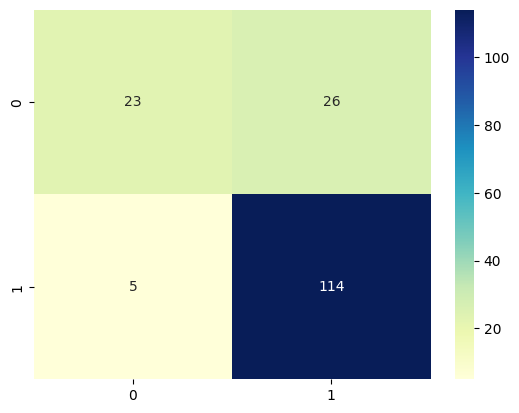


Accuracy: 0.8154761904761905
Precision: 0.8142857142857143
Recall: 0.957983193277311
F1 Score: 0.8803088803088803


In [267]:
print("RandomForest with HyperTuned Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_grid_rf, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_grid_rf)
print("Precision:", precision_grid_rf)
print("Recall:", recall_grid_rf)
print("F1 Score:", f1_grid_rf)

# Summary

In [ ]:
# Best estimator and its parameters
best_estimator = gs.best_estimator_
best_params = gs.best_params_

print("Best parameters:", best_params)

# Evaluate on test set
pred = best_estimator.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Classification Report:\n", metrics.classification_report(y_test, pred))

In [338]:
models = ['Logistic Regression', 'Logistic Regression(Grid)', 'AdaBoost', 'AdaBoost(Grid)',
          'XGBoost', 'XGBoost(Grid)', 'LightGBM', 'LightGBM(Grid)', 'Descision Tree', 'Descision Tree(grid)',
          'Random Forest', 'Random Forest(Grid)']


accuracy = [accuracy_lr, accuracy_grid_lr, accuracy_ada, accuracy_grid_ada,
            accuracy_xgb, accuracy_grid_xgboost, accuracy_lgbm, accuracy_grid_lgbm,
            accuracy_dt, accuracy_grid_dt, accuracy_rf, accuracy_grid_rf]


precision = [precision_lr, precision_grid_lr, precision_ada, precision_grid_ada,
              precision_xgb, precision_grid_xgboost, precision_lgbm, precision_grid_lgbm,
              precision_dt, precision_grid_dt, precision_rf, precision_grid_rf]

recall = [recall_lr, recall_grid_lr, recall_ada, recall_grid_ada,
          recall_xgb, recall_grid_xgboost, recall_lgbm, recall_grid_lgbm,
          recall_dt, recall_grid_dt, recall_rf, recall_grid_rf]

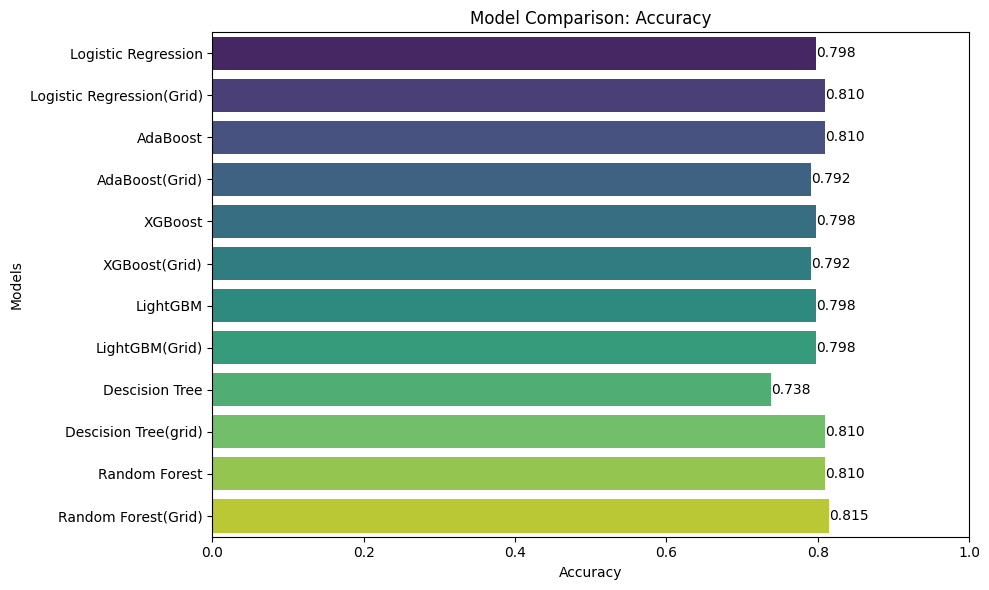

In [339]:
df_accuracy = pd.DataFrame({'Model': models, 'Accuracy': accuracy})
df_precision = pd.DataFrame({'Model': models, 'Precision': precision})
df_recall = pd.DataFrame({'Model': models, 'Recall': recall})

plt.figure(figsize=(10,6))

ax = sns.barplot( x='Accuracy', y='Model', data=df_accuracy, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.3f')
plt.xlim(0.0, 1.0)
plt.title('Model Comparison: Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Models')

plt.tight_layout()
plt.show()

It is very interesting to see that default Decision Tree perform the worst out all the models. But once parameter hyperparameter tuned it is nearly as accurate as the top performing model which is hyperparatemeter tuned random forest model.

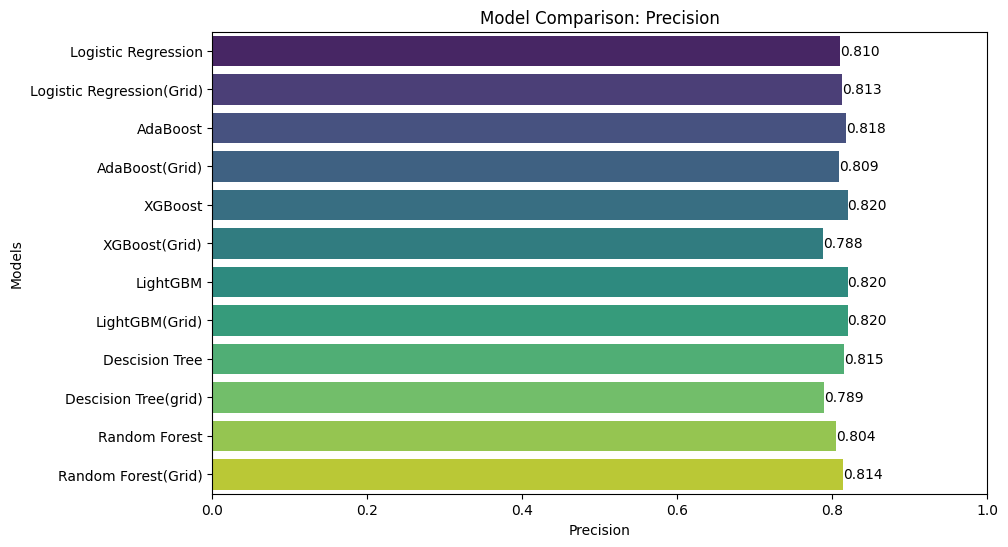

In [270]:
plt.figure(figsize=(10,6))

ax =sns.barplot(x='Precision', y='Model', data=df_precision, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.3f', color='black')
plt.xlim(0.0, 1.0)
plt.title('Model Comparison: Precision')
plt.xlabel('Precision')
plt.ylabel('Models')

plt.show()

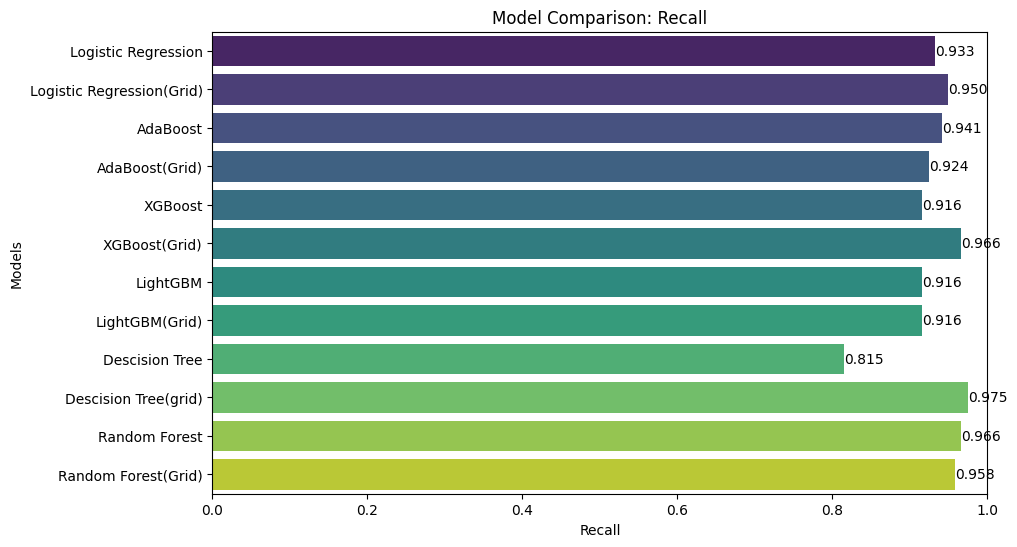

In [271]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x='Recall', y='Model', data=df_recall, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.3f', color='black')
plt.xlim(0.0, 1.0)
plt.title('Model Comparison: Recall')
plt.xlabel('Recall')
plt.ylabel('Models')

plt.show()

High precision and even higher recall is a tendency we have been seeing throughout all the models. This is perhaps an indication of class imbalance, which is why we used precision as our scoring metrics.
Additionally, ensamble learning models are not as sensitive to class imbalance, they share similar statistics but have higher recall

## PCA

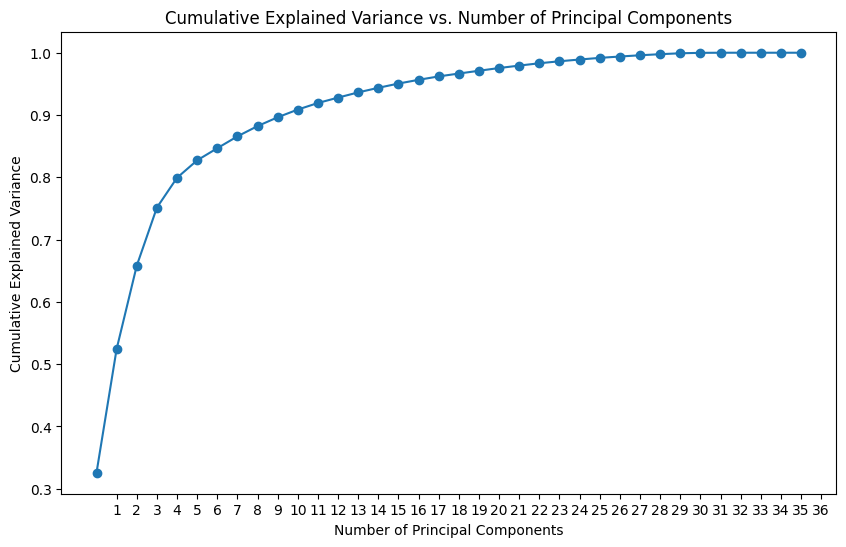

In [272]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=None)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(ticks=range(1, len(cumulative_explained_variance) + 1), labels=[str(i) for i in range(1, len(cumulative_explained_variance) + 1)])
plt.show()


In [273]:
cumulative_explained_variance

array([0.3257474 , 0.52442567, 0.65816267, 0.75136445, 0.79923257,
       0.82726062, 0.84669536, 0.86571197, 0.88219832, 0.89636964,
       0.90874357, 0.91930065, 0.92794507, 0.93630741, 0.94367543,
       0.9504968 , 0.9565061 , 0.9619719 , 0.96658338, 0.97105489,
       0.97542606, 0.97934305, 0.98307852, 0.98626947, 0.98908293,
       0.99172516, 0.99389866, 0.99591697, 0.99763538, 0.99910866,
       0.99980334, 0.99998318, 1.        , 1.        , 1.        ,
       1.        ])

In [274]:
X_train_pca = X_train_pca[:, 0:20]
X_test_pca = X_test_pca[:, 0:20]

## Logistic Regression PCA

In [275]:
# Logistic Regression with PCA
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_pca, y_train)
y_pred_lr = lr.predict(X_test_pca)

In [276]:
conf_mat_lr_pca = confusion_matrix(y_test, y_pred_lr)
accuracy_lr_pca = accuracy_score(y_test, y_pred_lr)
precision_lr_pca = precision_score(y_test, y_pred_lr)
recall_lr_pca = recall_score(y_test, y_pred_lr)
f1_lr_pca = f1_score(y_test, y_pred_lr)

Logistic Regression with PCA:

Confusion Matrix:


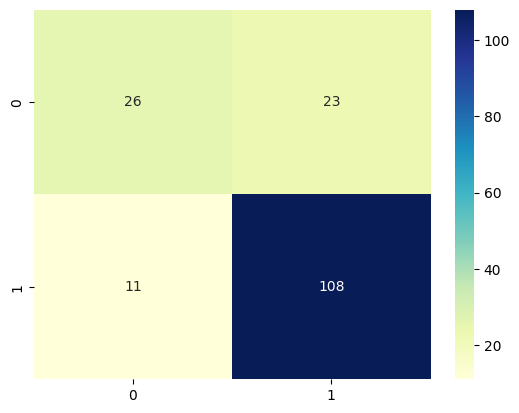


Accuracy: 0.7976190476190477
Precision: 0.8244274809160306
Recall: 0.907563025210084
F1 Score: 0.8640000000000001


In [277]:
print("Logistic Regression with PCA:")
print("\nConfusion Matrix:")
sns.heatmap(conf_mat_lr_pca, annot=True, cmap='YlGnBu', fmt='.8g')
plt.show()
print("\nAccuracy:", accuracy_lr_pca)
print("Precision:", precision_lr_pca)
print("Recall:", recall_lr_pca)
print("F1 Score:", f1_lr_pca)

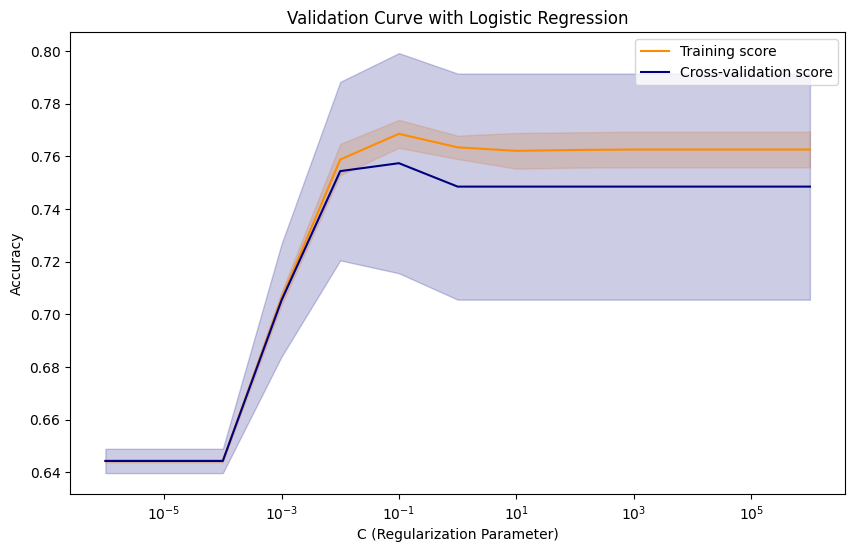

In [278]:
param_range = np.logspace(-6, 6, 13)

train_scores, test_scores = validation_curve(
    lr,
    X_train_pca, y_train,
    param_name="C",
    param_range=param_range,
    scoring=make_scorer(accuracy_score),
    cv=10,
    n_jobs=-1
)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange"
)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy")
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy"
)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.show()


## Logistic Regression Gridsearch

In [279]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10, 100, 200, 500, 1000, 2000]
}

In [280]:
lr_grid = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(lr_grid, param_grid_lr, cv=5)
grid_search_lr.fit(X_train_pca, y_train)
y_pred_grid_lr = grid_search_lr.predict(X_test_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [281]:
print(grid_search_lr.best_estimator_)

LogisticRegression(C=0.1, max_iter=10, random_state=42, solver='liblinear')


In [282]:
conf_mat_grid_lr_pca = confusion_matrix(y_test, y_pred_grid_lr)
accuracy_grid_lr_pca = accuracy_score(y_test, y_pred_grid_lr)
precision_grid_lr_pca = precision_score(y_test, y_pred_grid_lr)
recall_grid_lr_pca = recall_score(y_test, y_pred_grid_lr)
f1_grid_lr_pca = f1_score(y_test, y_pred_grid_lr)

In [283]:
best_estimator = grid_search_lr.best_estimator_

In [284]:

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_estimator,
    X=X_train_pca,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

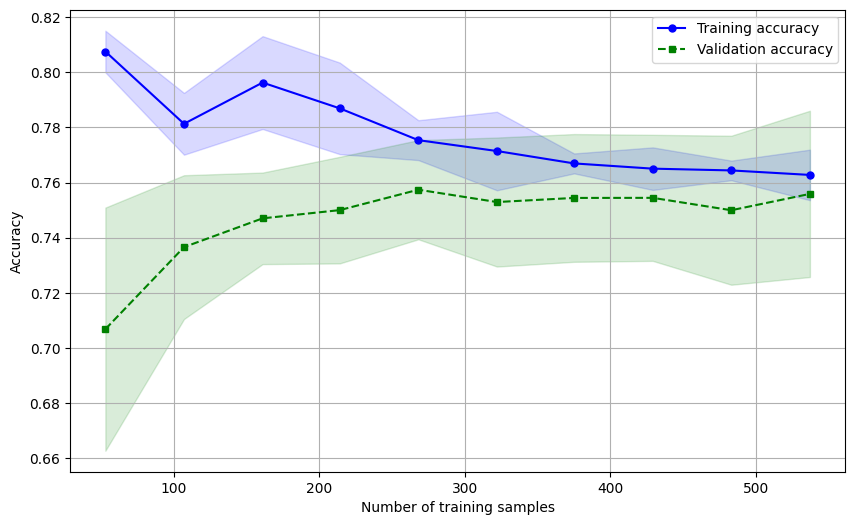

In [285]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

Logistic Regression with PCA and Grid Search:

Confusion Matrix:


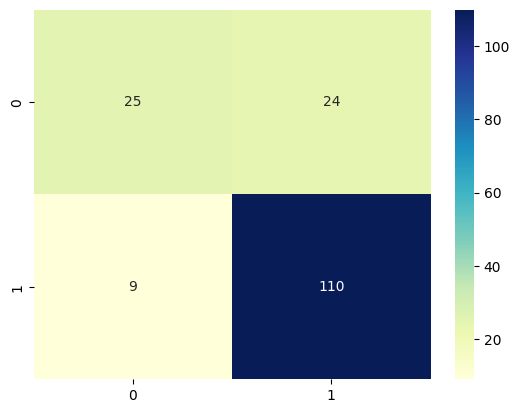


Accuracy: 0.8035714285714286
Precision: 0.8208955223880597
Recall: 0.9243697478991597
F1 Score: 0.8695652173913043


In [286]:
print("Logistic Regression with PCA and Grid Search:")
print("\nConfusion Matrix:")
sns.heatmap(conf_mat_grid_lr_pca, annot=True, cmap='YlGnBu', fmt='.8g')
plt.show()
print("\nAccuracy:", accuracy_grid_lr_pca)
print("Precision:", precision_grid_lr_pca)
print("Recall:", recall_grid_lr_pca)
print("F1 Score:", f1_grid_lr_pca)

## AdaBoostClassifier

In [287]:
# AdaBoost with PCA
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_pca, y_train)
y_pred_adaboost = adaboost.predict(X_test_pca)

In [288]:
conf_mat_adaboost_pca = confusion_matrix(y_test, y_pred_adaboost)
accuracy_adaboost_pca = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost_pca = precision_score(y_test, y_pred_adaboost)
recall_adaboost_pca = recall_score(y_test, y_pred_adaboost)
f1_adaboost_pca = f1_score(y_test, y_pred_adaboost)

AdaBoost with PCA:

Confusion Matrix:


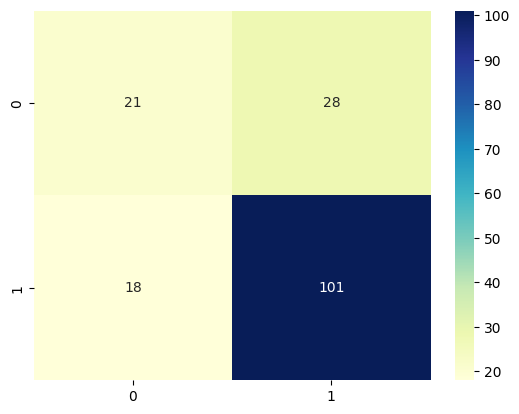


Accuracy: 0.7261904761904762
Precision: 0.7829457364341085
Recall: 0.8487394957983193
F1 Score: 0.814516129032258


In [289]:
print("AdaBoost with PCA:")
print("\nConfusion Matrix:")
sns.heatmap(conf_mat_adaboost_pca, annot=True, cmap='YlGnBu', fmt='.8g')
plt.show()
print("\nAccuracy:", accuracy_adaboost_pca)
print("Precision:", precision_adaboost_pca)
print("Recall:", recall_adaboost_pca)
print("F1 Score:", f1_adaboost_pca)

## AdaBoostClassifier Gridsearch

In [290]:
param_grid_adaboost = {'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 0.01, 0.001]}

In [291]:
grid_search_adaboost = GridSearchCV(adaboost, param_grid_adaboost, scoring='precision')
grid_search_adaboost.fit(X_train_pca, y_train)
y_pred_adaboost = grid_search_adaboost.best_estimator_.predict(X_test_pca)

In [292]:
conf_mat_grid_ada_pca = confusion_matrix(y_test, y_pred_adaboost)
accuracy_grid_ada_pca = accuracy_score(y_test, y_pred_adaboost)
precision_grid_ada_pca = precision_score(y_test, y_pred_adaboost)
recall_grid_ada_pca = recall_score(y_test, y_pred_adaboost)
f1_grid_adaboost_pca = f1_score(y_test, y_pred_adaboost)

AdaBoost with PCA and Grid Search:

Confusion Matrix:


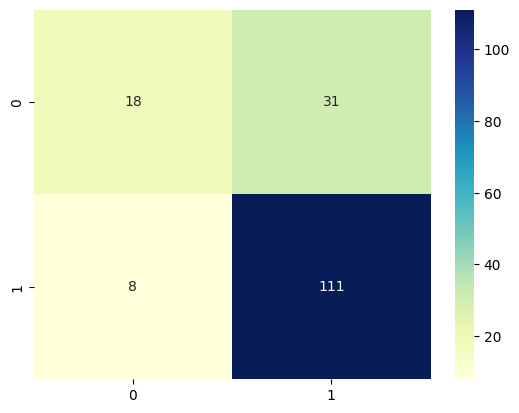


Accuracy: 0.7678571428571429
Precision: 0.7816901408450704
Recall: 0.9327731092436975
F1 Score: 0.8505747126436782


In [293]:
print("AdaBoost with PCA and Grid Search:")
print("\nConfusion Matrix:")
sns.heatmap(conf_mat_grid_ada_pca, annot=True, cmap='YlGnBu', fmt='.8g')
plt.show()
print("\nAccuracy:", accuracy_grid_ada_pca)
print("Precision:", precision_grid_ada_pca)
print("Recall:", recall_grid_ada_pca)
print("F1 Score:", f1_grid_adaboost_pca)

## XGBOOST classifier

In [294]:
clf_xgboost = XGBClassifier()
clf_xgboost.fit(X_train_pca, y_train)
y_pred_xgboost = clf_xgboost.predict(X_test_pca)

In [295]:
conf_mat_xgboost_pca = confusion_matrix(y_test, y_pred_xgboost)
accuracy_xgboost_pca = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost_pca = precision_score(y_test, y_pred_xgboost)
recall_xgboost_pca = recall_score(y_test, y_pred_xgboost)
f1_xgboost_pca = f1_score(y_test, y_pred_xgboost)

XGBoost with PCA:

Confusion Matrix:


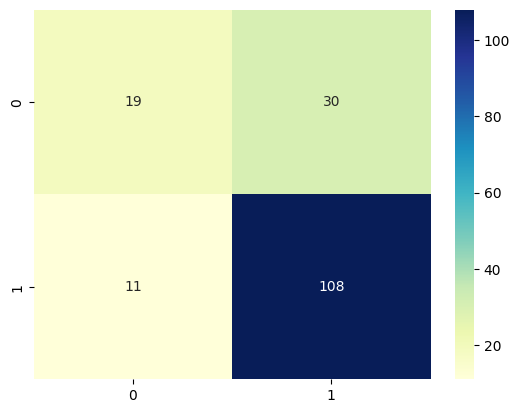


Accuracy: 0.7559523809523809
Precision: 0.782608695652174
Recall: 0.907563025210084
F1 Score: 0.840466926070039


In [296]:
print("XGBoost with PCA:")
print("\nConfusion Matrix:")
sns.heatmap(conf_mat_xgboost_pca, annot=True, cmap='YlGnBu', fmt='.8g')
plt.show()
print("\nAccuracy:", accuracy_xgboost_pca)
print("Precision:", precision_xgboost_pca)
print("Recall:", recall_xgboost_pca)
print("F1 Score:", f1_xgboost_pca)

## XGBOOST CLassifier gridsearch

In [297]:
param_grid_xgboost = {'n_estimators': [10, 50, 100], 'max_depth': [2, 4, 6], 'learning_rate': [0.1, 0.01, 0.001]}

In [298]:
grid_search_xgboost = GridSearchCV(clf_xgboost, param_grid_xgboost, scoring='precision')
grid_search_xgboost.fit(X_train_pca, y_train)
y_pred_grid_xgboost = grid_search_xgboost.best_estimator_.predict(X_test_pca)

In [299]:
conf_mat_grid_xgboost_pca = confusion_matrix(y_test, y_pred_grid_xgboost)
accuracy_grid_xgboost_pca = accuracy_score(y_test, y_pred_grid_xgboost)
precision_grid_xgboost_pca = precision_score(y_test, y_pred_grid_xgboost)
recall_grid_xgboost_pca = recall_score(y_test, y_pred_grid_xgboost)
f1_grid_xgboost_pca = f1_score(y_test, y_pred_grid_xgboost)

XGBoost with PCA and Grid Search:

Confusion Matrix:


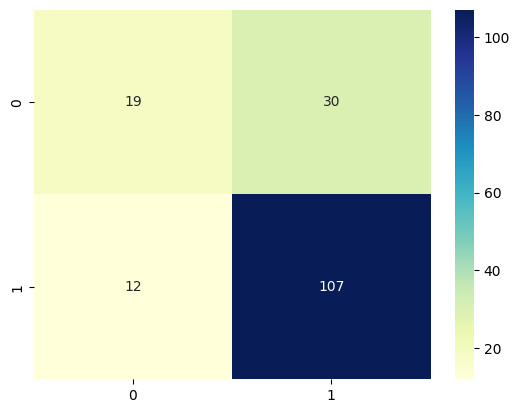


Accuracy: 0.75
Precision: 0.781021897810219
Recall: 0.8991596638655462
F1 Score: 0.8359375000000001


In [300]:
print("XGBoost with PCA and Grid Search:")
print("\nConfusion Matrix:")
sns.heatmap(conf_mat_grid_xgboost_pca, annot=True, cmap='YlGnBu', fmt='.8g')
plt.show()
print("\nAccuracy:", accuracy_grid_xgboost_pca)
print("Precision:", precision_grid_xgboost_pca)
print("Recall:", recall_grid_xgboost_pca)
print("F1 Score:", f1_grid_xgboost_pca)

## LGBM  classifier

In [301]:
params_lgbm = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'num_leaves': 63,
    'max_depth': -1,
}

In [302]:
lgbm = lgb.LGBMClassifier(**params_lgbm)
lgbm.fit(X_train_pca, y_train)
y_pred_lgbm = lgbm.predict(X_test_pca)

[LightGBM] [Info] Number of positive: 433, number of negative: 239
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4484
[LightGBM] [Info] Number of data points in the train set: 672, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.644345 -> initscore=0.594274
[LightGBM] [Info] Start training from score 0.594274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [303]:
conf_mat_lgbm_pca = confusion_matrix(y_test, y_pred_lgbm)
accuracy_lgbm_pca = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm_pca = precision_score(y_test, y_pred_lgbm)
recall_lgbm_pca = recall_score(y_test, y_pred_lgbm)
f1_lgbm_pca = f1_score(y_test, y_pred_lgbm)

LightGBM with PCA:

Confusion Matrix:


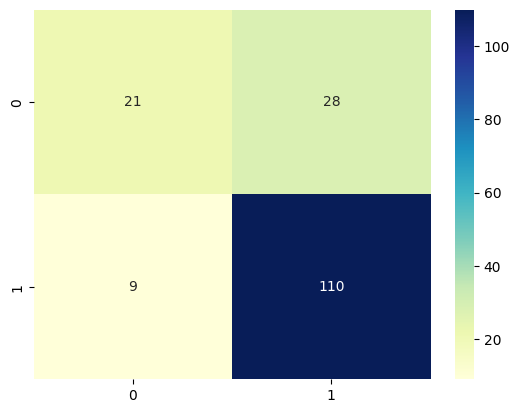


Accuracy: 0.7797619047619048
Precision: 0.7971014492753623
Recall: 0.9243697478991597
F1 Score: 0.8560311284046693


In [304]:
print("LightGBM with PCA:")
print("\nConfusion Matrix:")
sns.heatmap(conf_mat_lgbm_pca, annot=True, cmap='YlGnBu', fmt='.8g')
plt.show()
print("\nAccuracy:", accuracy_lgbm_pca)
print("Precision:", precision_lgbm_pca)
print("Recall:", recall_lgbm_pca)
print("F1 Score:", f1_lgbm_pca)

## LGBM GRIDSEARCH

In [305]:
param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, None],
}

In [306]:
clf_lgbm = lgb.LGBMClassifier()
grid_search_lgbm = GridSearchCV(clf_lgbm, param_grid_lgbm, scoring='precision')
grid_search_lgbm.fit(X_train_pca, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 346, number of negative: 191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3584
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.644320 -> initscore=0.594165
[LightGBM] [Info] Start training from score 0.594165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [-1, None],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 63, 127]},
             scoring='precision')

In [307]:
y_pred_grid_lgbm = grid_search_lgbm.best_estimator_.predict(X_test_pca)

In [308]:
conf_mat_grid_lgbm_pca = confusion_matrix(y_test, y_pred_grid_lgbm)
accuracy_grid_lgbm_pca = accuracy_score(y_test, y_pred_grid_lgbm)
precision_grid_lgbm_pca = precision_score(y_test, y_pred_grid_lgbm)
recall_grid_lgbm_pca = recall_score(y_test, y_pred_grid_lgbm)
f1_grid_lgbm_pca = f1_score(y_test, y_pred_grid_lgbm)

LightGBM with PCA and Grid Search:

Confusion Matrix:


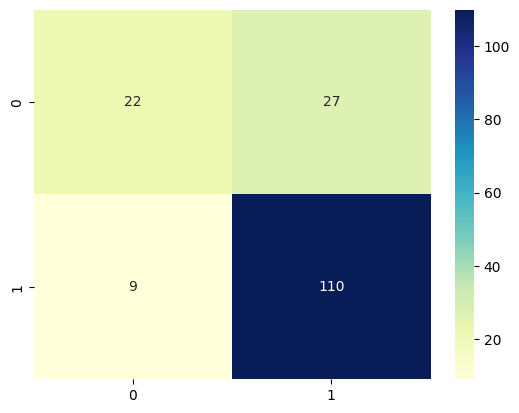


Accuracy: 0.7857142857142857
Precision: 0.8029197080291971
Recall: 0.9243697478991597
F1 Score: 0.8593750000000001


In [309]:
print("LightGBM with PCA and Grid Search:")
print("\nConfusion Matrix:")
sns.heatmap(conf_mat_grid_lgbm_pca, annot=True, cmap='YlGnBu', fmt='.8g')
plt.show()
print("\nAccuracy:", accuracy_grid_lgbm_pca)
print("Precision:", precision_grid_lgbm_pca)
print("Recall:", recall_grid_lgbm_pca)
print("F1 Score:", f1_grid_lgbm_pca)

## Desicion Tree

In [310]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_pca, y_train)
y_val_pred_dt = dt_classifier.predict(X_test_pca)

In [311]:
conf_mat_dt_pca = confusion_matrix(y_test, y_val_pred_dt)
accuracy_dt_pca = accuracy_score(y_test, y_val_pred_dt)
precision_dt_pca = precision_score(y_test, y_val_pred_dt)
recall_dt_pca = recall_score(y_test, y_val_pred_dt)
f1_dt_pca = f1_score(y_test, y_val_pred_dt)

Desicion Tree with Default Parameters:

 Confusion Matrix:


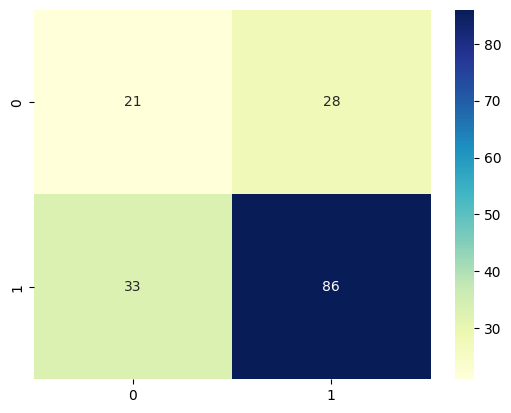


Accuracy: 0.6369047619047619
Precision: 0.7543859649122807
Recall: 0.7226890756302521
F1 Score: 0.7381974248927039


In [312]:
print("Desicion Tree with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_dt_pca, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_dt_pca)
print("Precision:", precision_dt_pca)
print("Recall:", recall_dt_pca)
print("F1 Score:", f1_dt_pca)

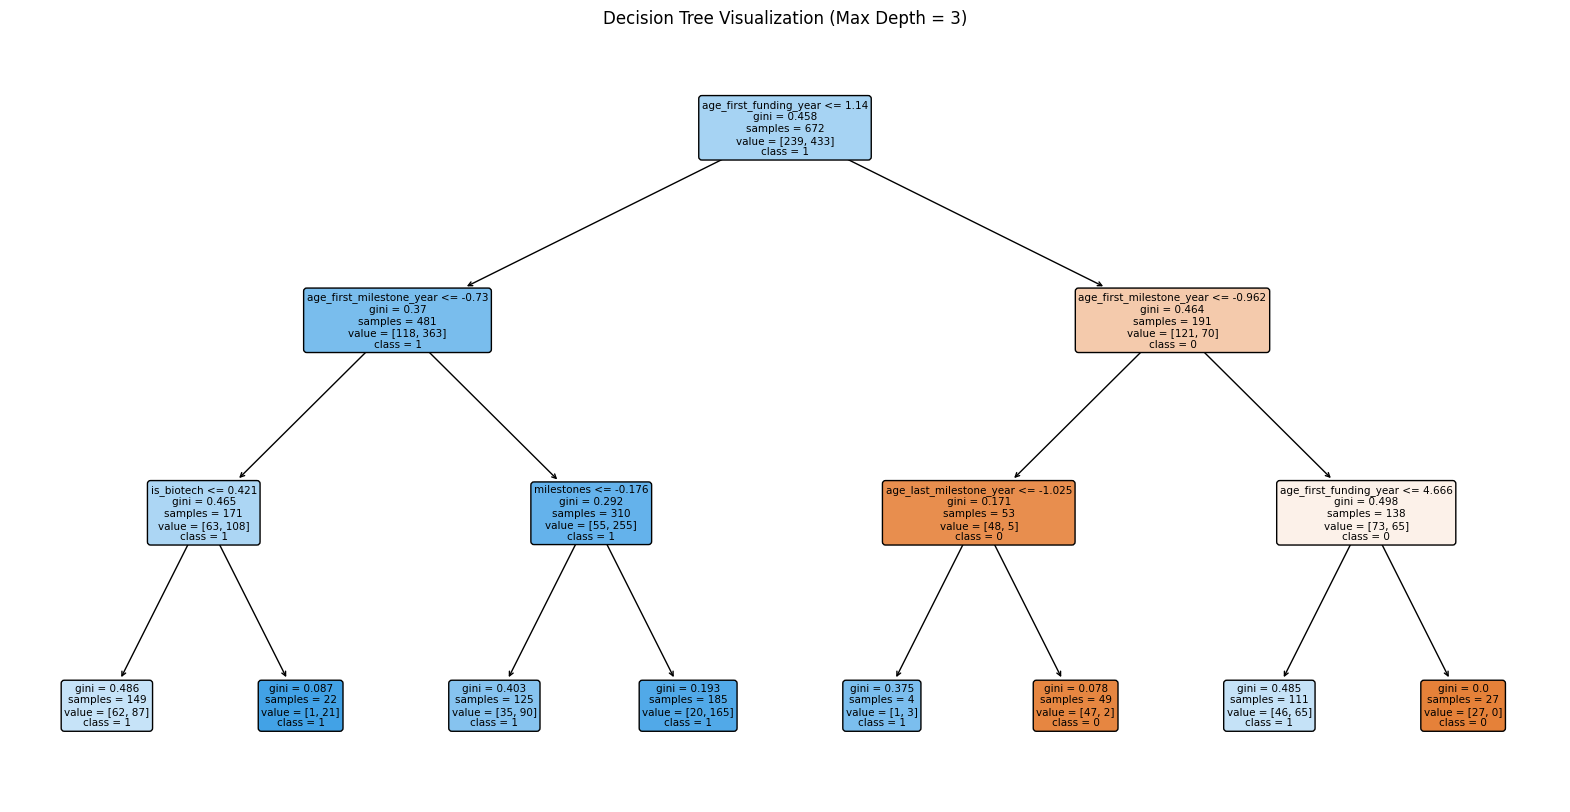

In [313]:
#lets adjust max depth

# Create and fit the decision tree
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train_pca, y_train)

# Convert the Index to a list
feature_names = X.columns.tolist()

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=feature_names, class_names=['0', '1'], filled=True, rounded=True)
plt.title('Decision Tree Visualization (Max Depth = 3)')
plt.show()

## Decision Tree with Gridsearch

In [314]:
params = {
    'min_samples_split': [5, 10, 20, 30, 40, 50],
    'max_depth': [1, 2, 3, None],
}

In [315]:
# Initiate grid search
dt = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

grid_dt = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=cv, n_jobs=-1)
grid_dt.fit(X_train_pca, y_train)
y_val_pred_dt = grid_dt.predict(X_test_pca)

In [316]:
conf_mat_grid_dt_pca = confusion_matrix(y_test, y_val_pred_dt)
accuracy_grid_dt_pca = accuracy_score(y_test, y_val_pred_dt)
precision_grid_dt_pca = precision_score(y_test, y_val_pred_dt)
recall_grid_dt_pca = recall_score(y_test, y_val_pred_dt)
f1_grid_dt_pca = f1_score(y_test, y_val_pred_dt)

Desicion Tree with Default Parameters:

 Confusion Matrix:


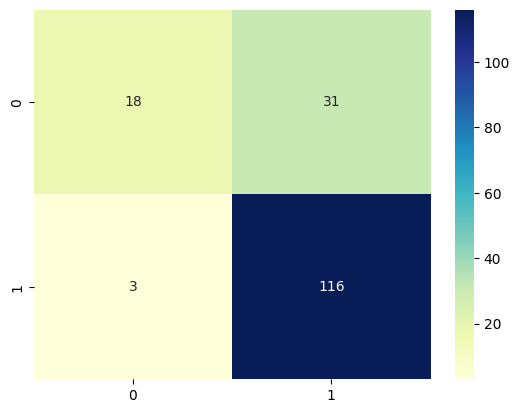


Accuracy: 0.75
Precision: 0.7483870967741936
Recall: 0.9747899159663865
F1 Score: 0.8467153284671532


In [317]:
print("Desicion Tree with Default Parameters:")
print("\n Confusion Matrix:")
sns.heatmap(conf_mat_grid_dt, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
print("\nAccuracy:", accuracy_grid_dt_pca)
print("Precision:", precision_grid_dt_pca)
print("Recall:", recall_grid_dt_pca)
print("F1 Score:", f1_grid_dt_pca)

## Randomforest

In [318]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_pca, y_train)
y_pred_rf = clf_rf.predict(X_test_pca)

In [319]:
conf_mat_rf_pca = confusion_matrix(y_test, y_pred_rf)
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf)
precision_rf_pca = precision_score(y_test, y_pred_rf)
recall_rf_pca = recall_score(y_test, y_pred_rf)
f1_rf_pca = f1_score(y_test, y_pred_rf)

Random Forest with PCA:

Confusion Matrix:


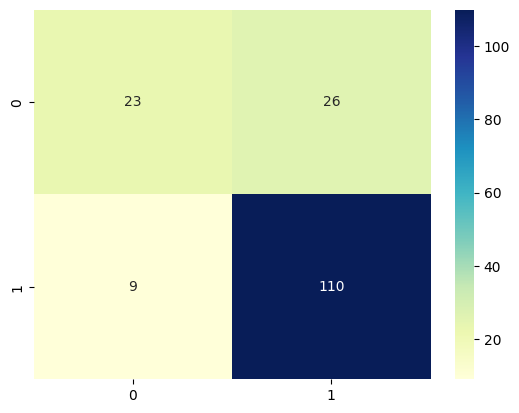


Accuracy: 0.7916666666666666
Precision: 0.8088235294117647
Recall: 0.9243697478991597
F1 Score: 0.8627450980392157


In [320]:
print("Random Forest with PCA:")
print("\nConfusion Matrix:")
sns.heatmap(conf_mat_rf_pca, annot=True, cmap='YlGnBu', fmt='.8g')
plt.show()
print("\nAccuracy:", accuracy_rf_pca)
print("Precision:", precision_rf_pca)
print("Recall:", recall_rf_pca)
print("F1 Score:", f1_rf_pca)

## Randomforest Gridsearch

In [321]:
param_grid_rf = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False]
}

In [322]:
clf_rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(clf_rf, param_grid_rf, scoring='f1')
grid_search_rf.fit(X_train_pca, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 6, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='f1')

In [323]:
best_parameters_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

In [324]:
y_pred_rf_grid = best_estimator_rf.predict(X_test_pca)

In [325]:
conf_mat_rf_grid_pca = confusion_matrix(y_test, y_pred_rf_grid)
accuracy_rf_grid_pca = accuracy_score(y_test, y_pred_rf_grid)
precision_rf_grid_pca = precision_score(y_test, y_pred_rf_grid)
recall_rf_grid_pca = recall_score(y_test, y_pred_rf_grid)
f1_rf_grid_pca = f1_score(y_test, y_pred_rf_grid)

Random Forest with PCA and Grid Search:

Confusion Matrix:


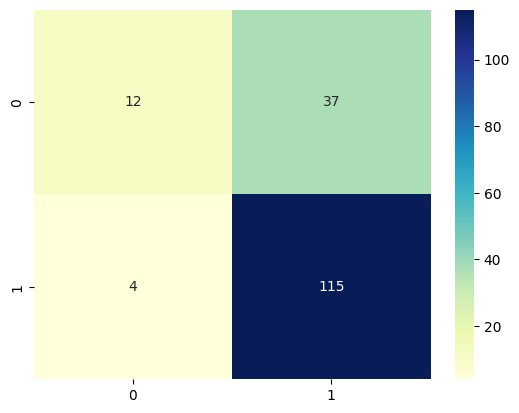


Accuracy: 0.7559523809523809
Precision: 0.756578947368421
Recall: 0.9663865546218487
F1 Score: 0.8487084870848709


In [326]:
print("Random Forest with PCA and Grid Search:")
print("\nConfusion Matrix:")
sns.heatmap(conf_mat_rf_grid_pca, annot=True, cmap='YlGnBu', fmt='.8g')
plt.show()
print("\nAccuracy:", accuracy_rf_grid_pca)
print("Precision:", precision_rf_grid_pca)
print("Recall:", recall_rf_grid_pca)
print("F1 Score:", f1_rf_grid_pca)

# Summary PCA

In [327]:
models = ['Logistic Regression', 'Logistic Regression(Grid)', 'AdaBoost', 'AdaBoost(Grid)',
          'XGBoost', 'XGBoost(Grid)', 'LightGBM', 'LightGBM(Grid)', 'Descision Tree', 'Descision Tree(grid)',
          'Random Forest', 'Random Forest(Grid)']


accuracy_pca = [accuracy_lr_pca, accuracy_grid_lr_pca, accuracy_adaboost_pca, accuracy_grid_ada_pca,
                accuracy_xgboost_pca, accuracy_grid_xgboost_pca, accuracy_lgbm_pca, accuracy_grid_lgbm_pca,
                accuracy_dt_pca, accuracy_grid_dt_pca, accuracy_rf_pca, accuracy_rf_grid_pca]

precision_pca = [precision_lr_pca, precision_grid_lr_pca, precision_adaboost_pca, precision_grid_ada_pca,
                 precision_xgboost_pca, precision_grid_xgboost_pca, precision_lgbm_pca, precision_grid_lgbm_pca,
                 precision_dt_pca, precision_grid_dt_pca,precision_rf_pca, precision_rf_grid_pca]

recall_pca = [recall_lr_pca, recall_grid_lr_pca, recall_adaboost_pca, recall_grid_ada_pca,
              recall_xgboost_pca, recall_grid_xgboost_pca, recall_lgbm_pca, recall_grid_lgbm_pca,
              recall_dt_pca, recall_grid_dt_pca,recall_rf_pca, recall_rf_grid_pca]

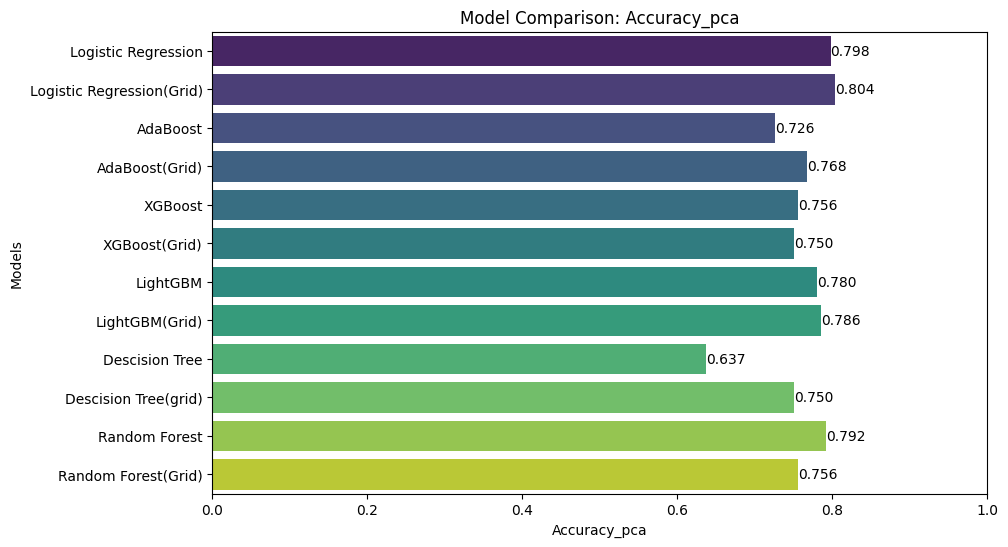

In [328]:
df_accuracy_pca = pd.DataFrame({'Model': models, 'Accuracy': accuracy_pca})
df_precision_pca = pd.DataFrame({'Model': models, 'Precision': precision_pca})
df_recall_pca = pd.DataFrame({'Model': models, 'Recall': recall_pca})

plt.figure(figsize=(10,6))
ax = sns.barplot( x='Accuracy', y='Model', data=df_accuracy_pca, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.3f')
plt.xlim(0.0, 1.0)
plt.title('Model Comparison: Accuracy_pca')
plt.xlabel('Accuracy_pca')
plt.ylabel('Models')
plt.show()

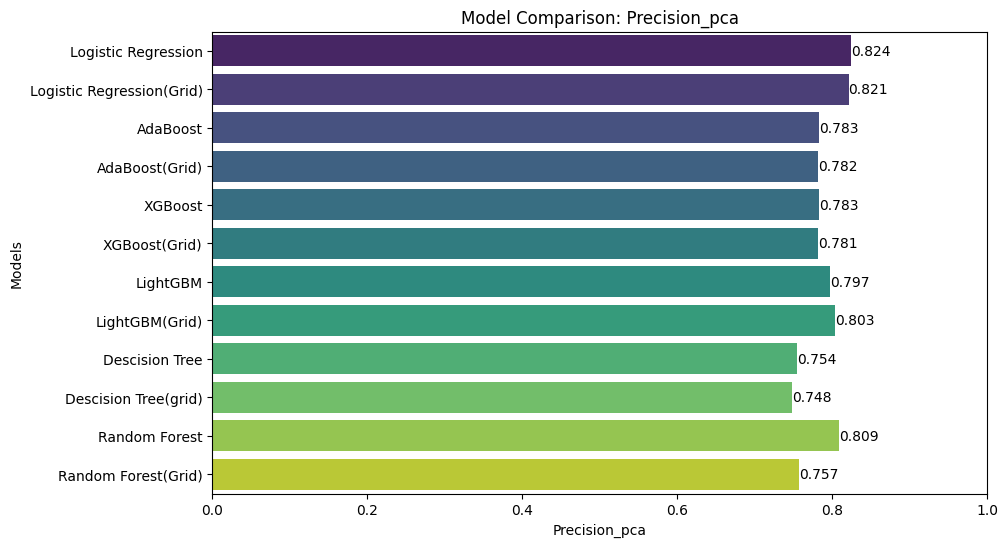

In [329]:
plt.figure(figsize=(10,6))

ax =sns.barplot(x='Precision', y='Model', data=df_precision_pca, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.3f', color='black')
plt.xlim(0.0, 1.0)
plt.title('Model Comparison: Precision_pca')
plt.xlabel('Precision_pca')
plt.ylabel('Models')
plt.show()

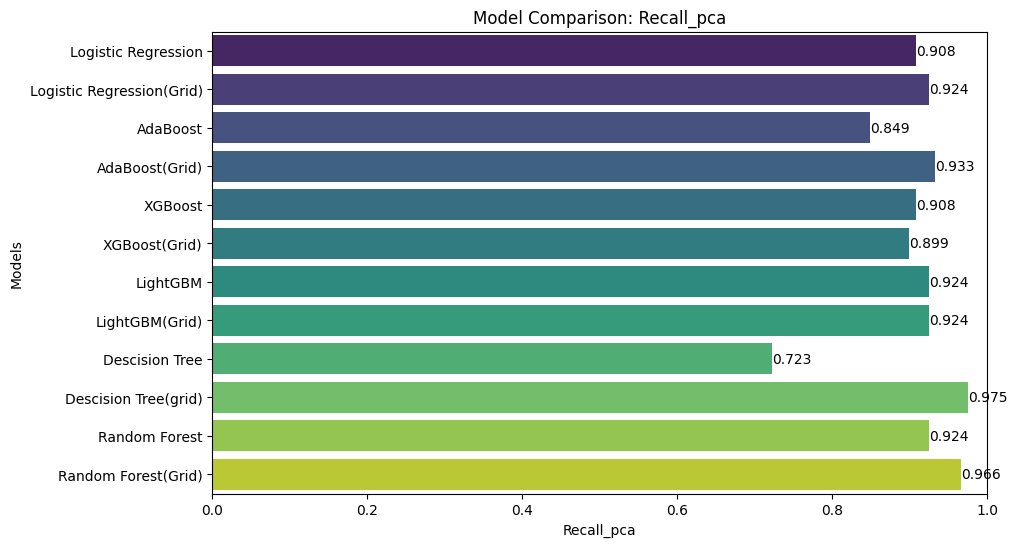

In [330]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Recall', y='Model', data=df_recall_pca, palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.3f', color='black')
plt.xlim(0.0, 1.0)
plt.title('Model Comparison: Recall_pca')
plt.xlabel('Recall_pca')
plt.ylabel('Models')
plt.show()

## Conclusion

In this projects, we used gridsearch to hypertune parameters, and accuracy, recall, precision metrics as well as learnign curve and use-case based elbow plots to evaluate prediction biases and overfitting. based on the learning and validation curves the final models are well fit and produce relatively high accuracy scores with bias towards false positive predictions. The bias towards false positive predictions led us to use precision as the scoring metric for some of the models. We also attempted to use f1-based scoring but it produced unsatisfactory results as the false positive rate change was not significant enough. The only exceptions to this rule were Decision Tree using PCA data and the Random Forest model using original data.

Using the preprocessed, data set (without pca transformation), Random Forest with grid search and hyper parameter tuned adaboost emerges as the top performer with the highest accuracy at 81%. In terms of precision, both Decision Tree and Random Forest models exhibit the highest precision at 82%. Random Forest also has the highest recall at 97%.

After transforming data for feature reduction using PCA with 20 features, the Logistic regression and Random Forest model, after hyperparameter tuning, have the highest accuracies of 81% and 80% respectively.


When comparing the performance of models on the PCA and original datasets the Random Forest model, while strong in both datasets, shows slightly higher accuracy on the original dataset compared to the PCA dataset. It is clear that models trained on the original dataset are sufficient for prediction. Hypertuned Random forest, logistic regression, decision tree and Adaboost are comparable in their accuracies, but we believe that the hyper-parameter tuned random forest model would be the best model for this dataset.


## Future considerations for this project include
Oversampling to balance the dataset using SMOTE. It would be useful to adjust the balance of the target variable to see if it impacts the bias toward falsely predicting false positives.
Using hyper-parameter tuned SVM with multiple kernels could turn a higher accuracy model.
Adding more datapoints to the data... the current data has uneven distributions of values from particular states, categories, and some companies have milestones and funding before founding. Those could be addressed with a bigger survey of startups which would curate a better dataset and potentially more accurate models.